In [2]:
import matplotlib.pyplot as plt
import pydicom as dicom
import matplotlib
import os, os.path
import imageio

/Users/work/res_env/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


We will count all the .dcm files in the given directory.

In [7]:
def file_names(directory_path, file_type):
    '''file path XXXX'''
    all_files = os.listdir(directory_path)
    file_names = [file for file in all_files if file.lower().endswith('.' + file_type)]
    return file_names

In [24]:
def create_gif(path, filenames, gif_name):
    images = []
    for filename in filenames:
        images.append(imageio.imread('./{}/{}'.format(path, filename)))
    imageio.mimsave(gif_name + '.gif', images, loop=0)
    return None

In [12]:
def create_directory(directory_name):
    if not os.path.exists(directory_name):
        os.makedirs(directory_name)
    return None

In [5]:
directory_path = 'manifest-1718402190360/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192'
file_type = 'dcm'

In [8]:
files = file_names(directory_path, file_type)
files.sort()
print(files)

['1-001.dcm', '1-002.dcm', '1-003.dcm', '1-004.dcm', '1-005.dcm', '1-006.dcm', '1-007.dcm', '1-008.dcm', '1-009.dcm', '1-010.dcm', '1-011.dcm', '1-012.dcm', '1-013.dcm', '1-014.dcm', '1-015.dcm', '1-016.dcm', '1-017.dcm', '1-018.dcm', '1-019.dcm', '1-020.dcm', '1-021.dcm', '1-022.dcm', '1-023.dcm', '1-024.dcm', '1-025.dcm', '1-026.dcm', '1-027.dcm', '1-028.dcm', '1-029.dcm', '1-030.dcm', '1-031.dcm', '1-032.dcm', '1-033.dcm', '1-034.dcm', '1-035.dcm', '1-036.dcm', '1-037.dcm', '1-038.dcm', '1-039.dcm', '1-040.dcm', '1-041.dcm', '1-042.dcm', '1-043.dcm', '1-044.dcm', '1-045.dcm', '1-046.dcm', '1-047.dcm', '1-048.dcm', '1-049.dcm', '1-050.dcm', '1-051.dcm', '1-052.dcm', '1-053.dcm', '1-054.dcm', '1-055.dcm', '1-056.dcm', '1-057.dcm', '1-058.dcm', '1-059.dcm', '1-060.dcm', '1-061.dcm', '1-062.dcm', '1-063.dcm', '1-064.dcm', '1-065.dcm', '1-066.dcm', '1-067.dcm', '1-068.dcm', '1-069.dcm', '1-070.dcm', '1-071.dcm', '1-072.dcm', '1-073.dcm', '1-074.dcm', '1-075.dcm', '1-076.dcm', '1-077.dcm'

In [18]:
ct_filenames=[]
for file in files:
    filename=file.replace('.dcm', '')+'.png'
    image_path = '{}/{}'.format(directory_path, file)
    ds = dicom.dcmread(image_path)
    create_directory('ct_images')
    plt.imsave('./ct_images/'+filename, ds.pixel_array)
    ct_filenames.append(filename)

In [16]:
from gudhi import CubicalComplex
import gudhi as gd

/Users/work/res_env/lib/python3.9/site-packages/gudhi/persistence_graphical_tools.py:323: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, axes = plt.subplots(1, 1)


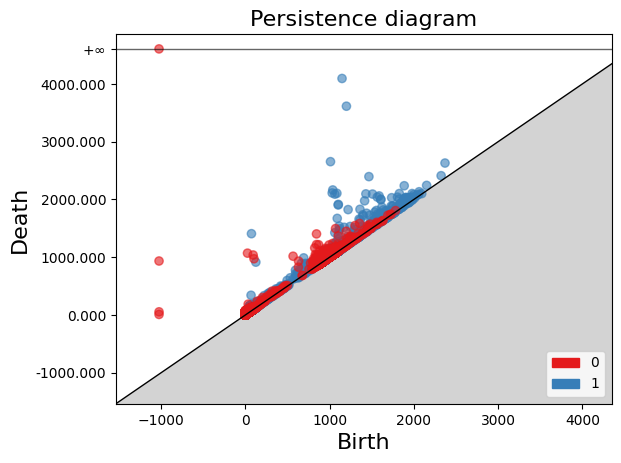

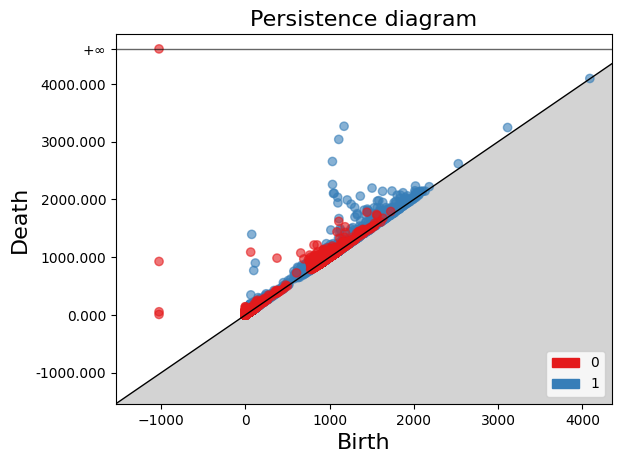

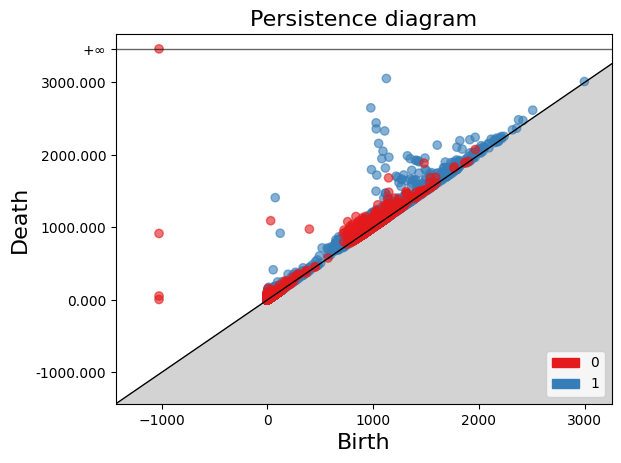

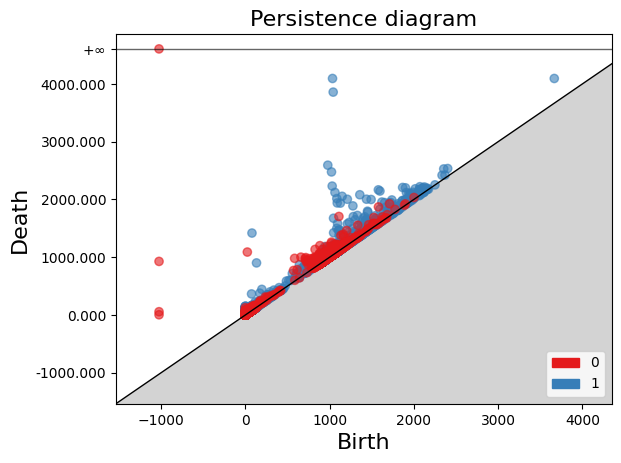

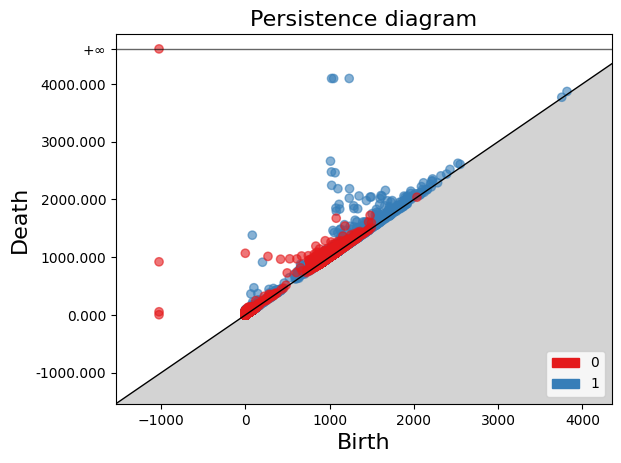

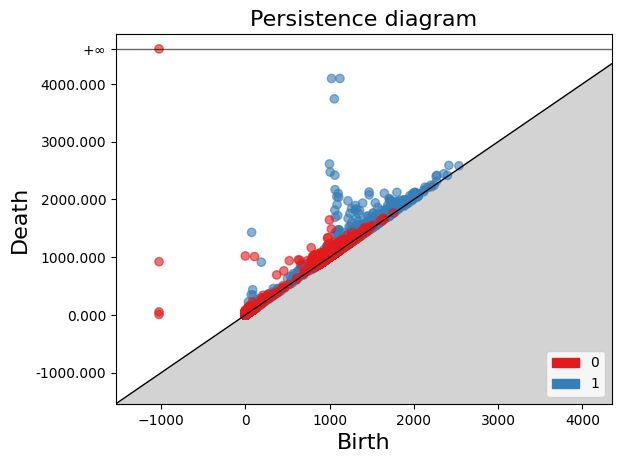

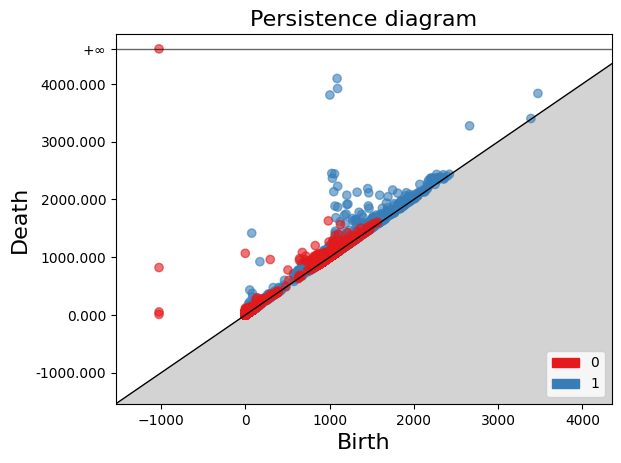

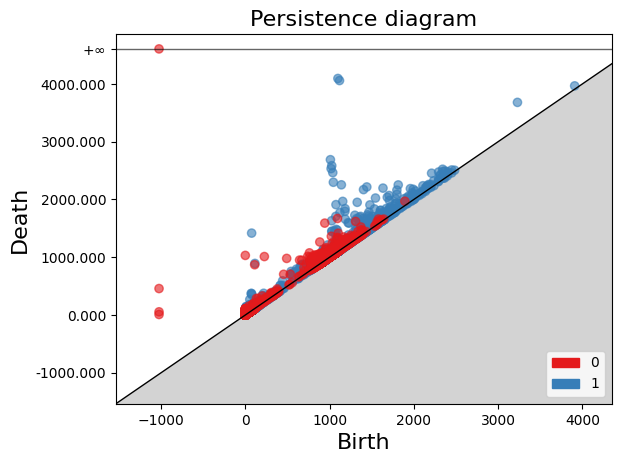

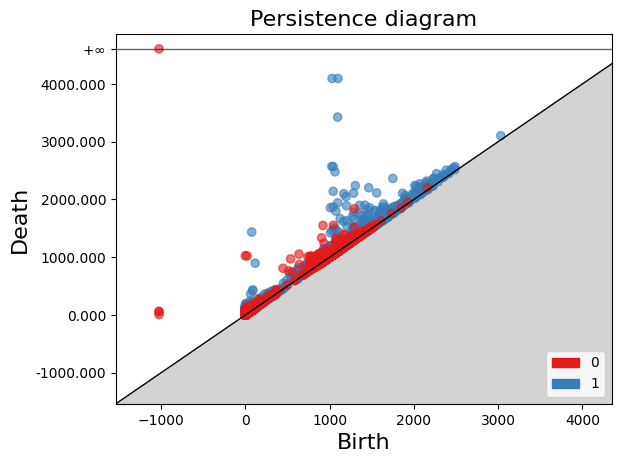

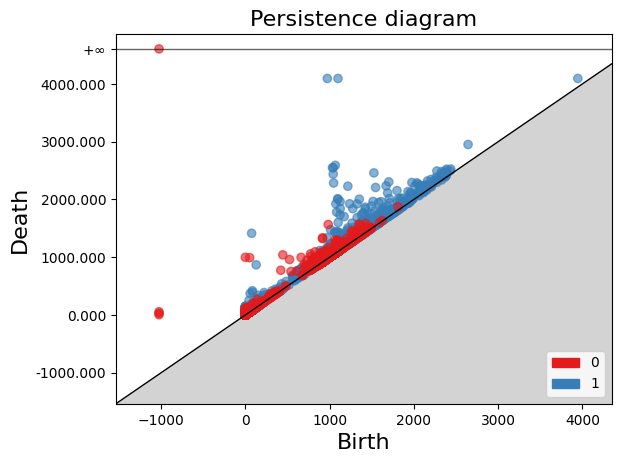

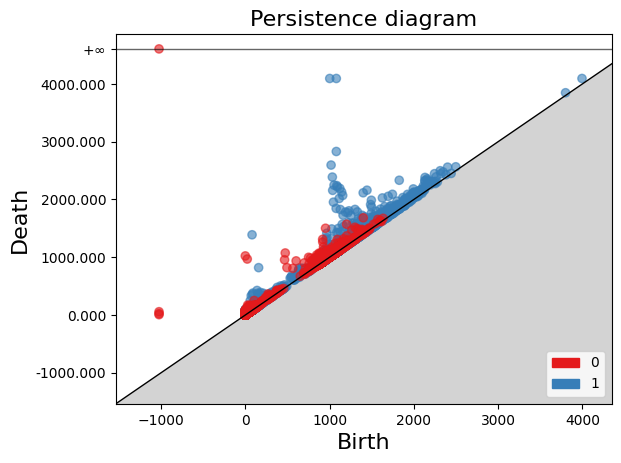

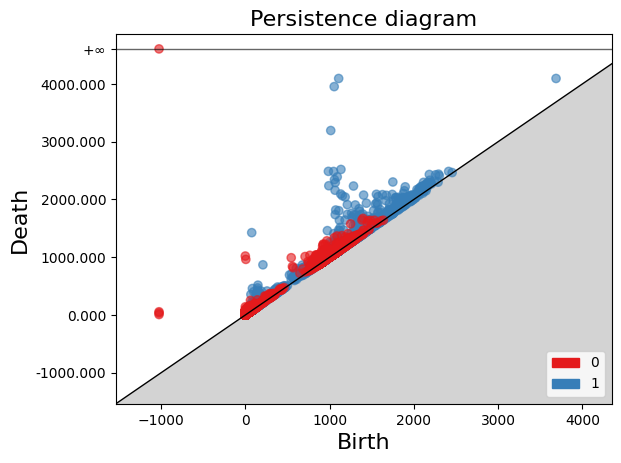

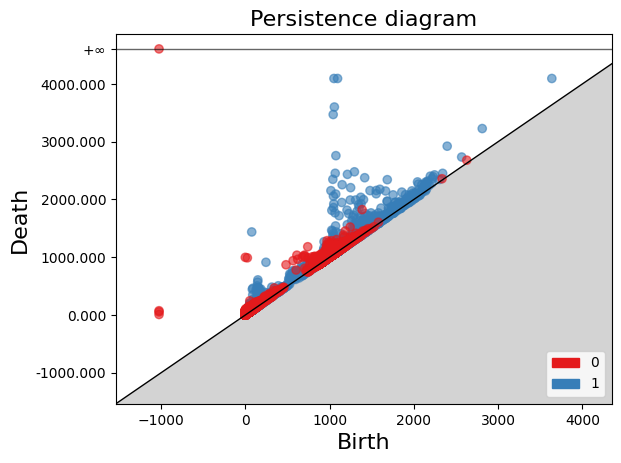

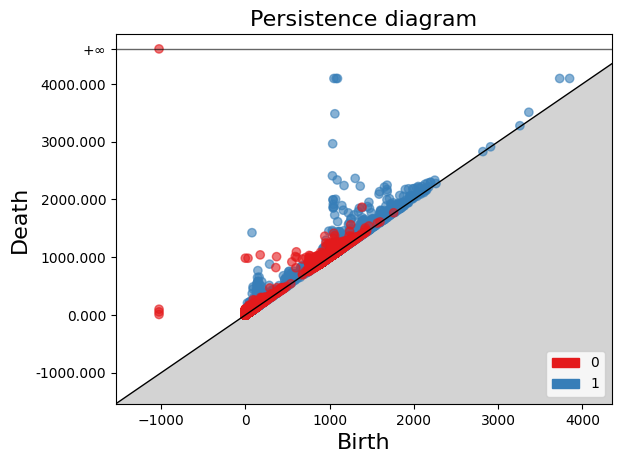

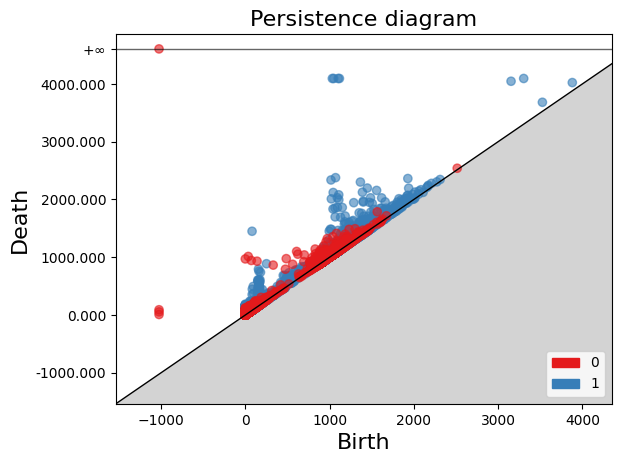

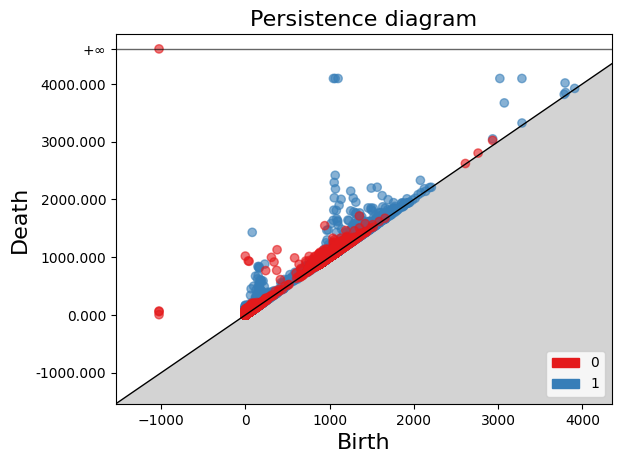

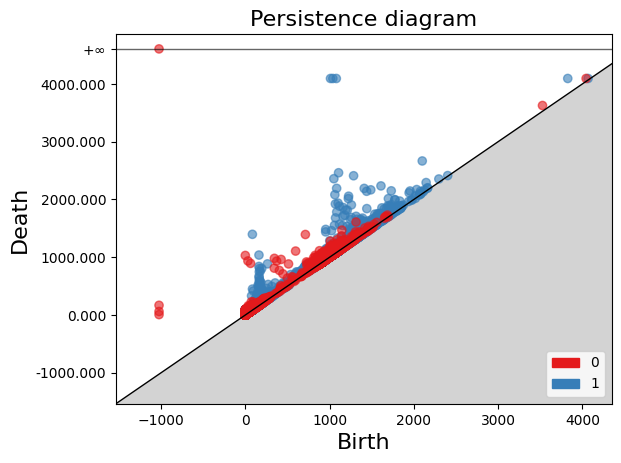

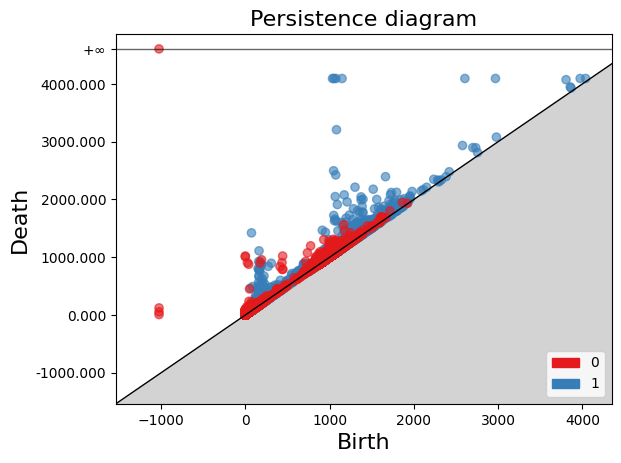

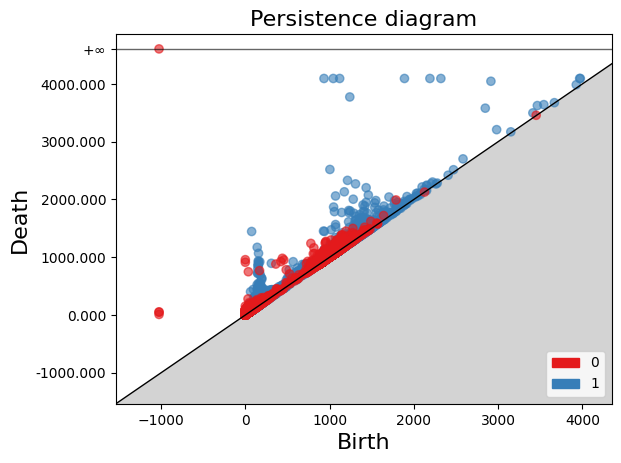

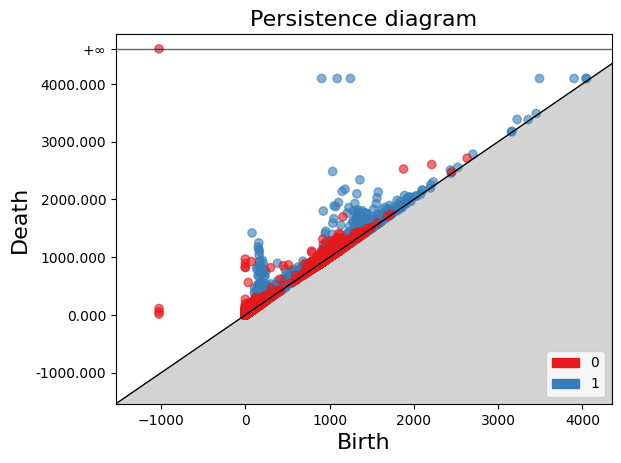

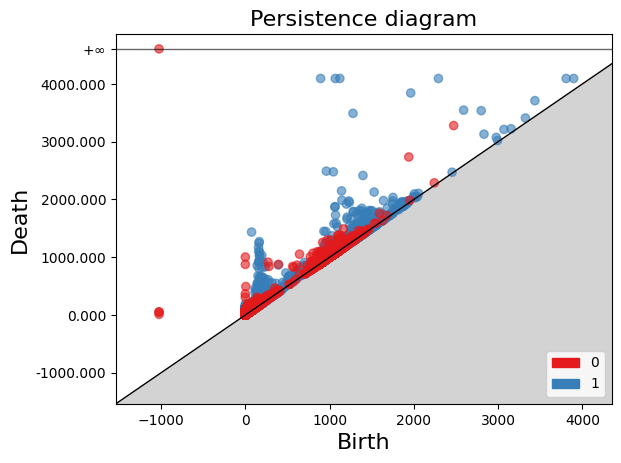

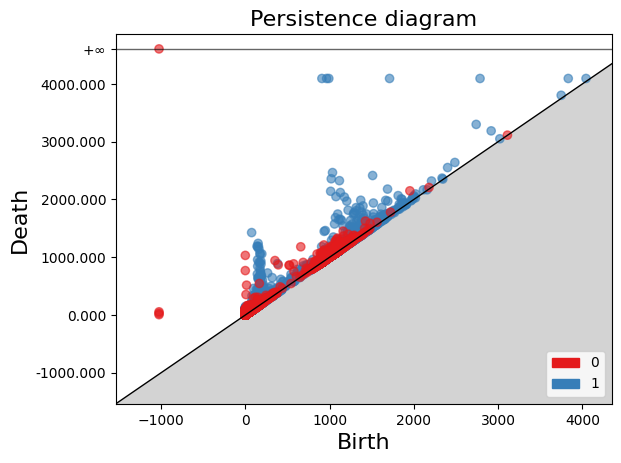

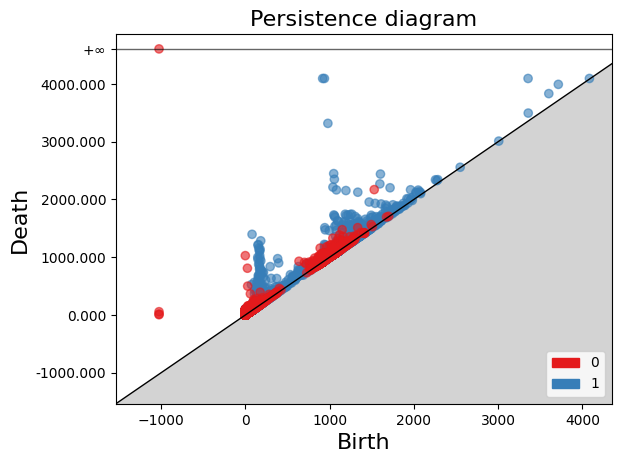

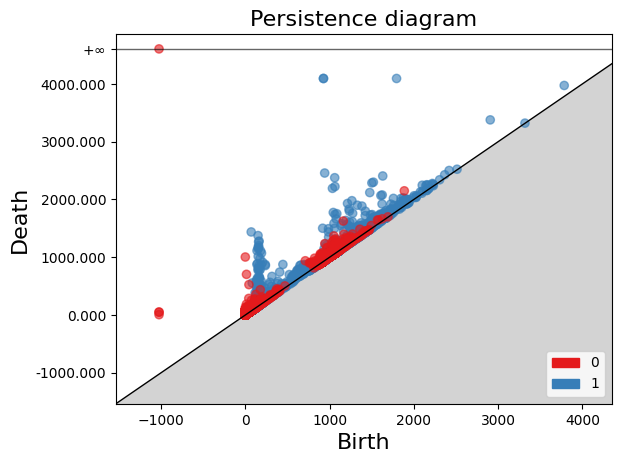

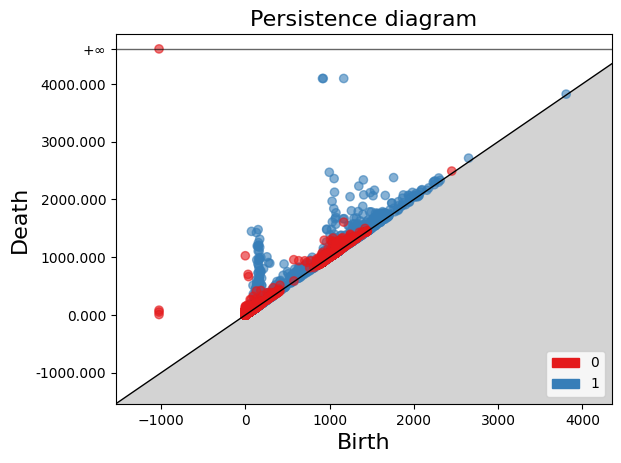

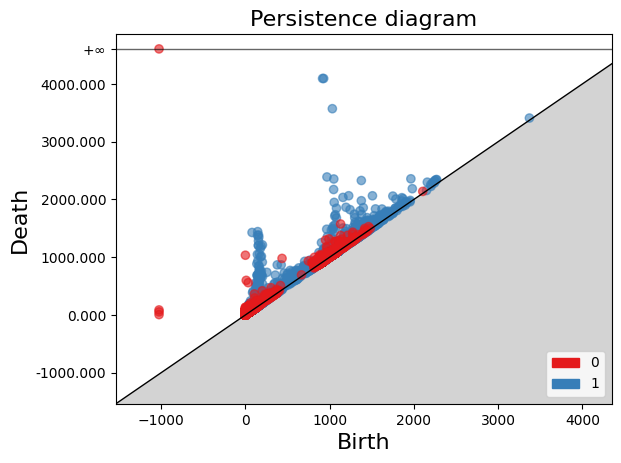

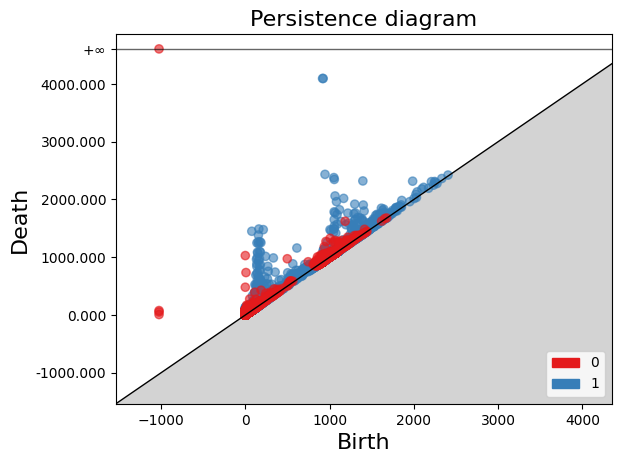

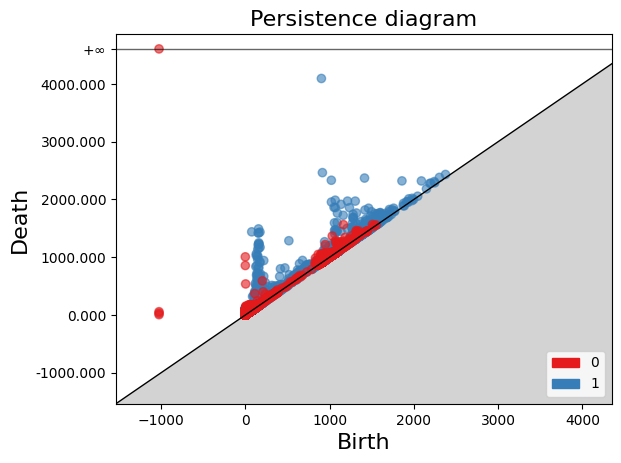

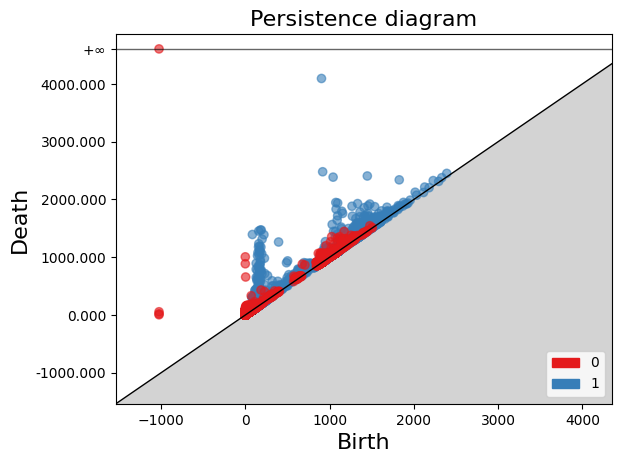

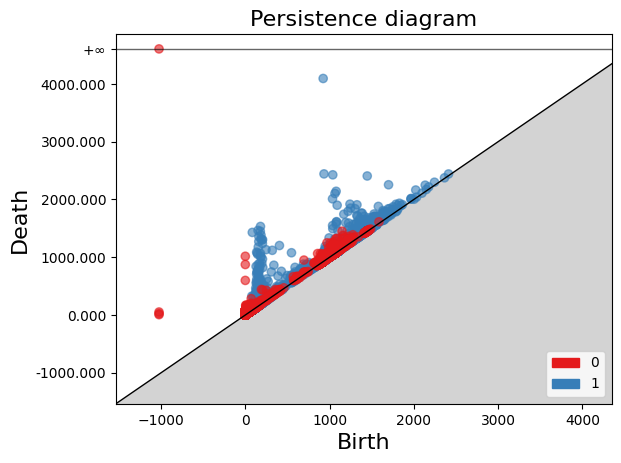

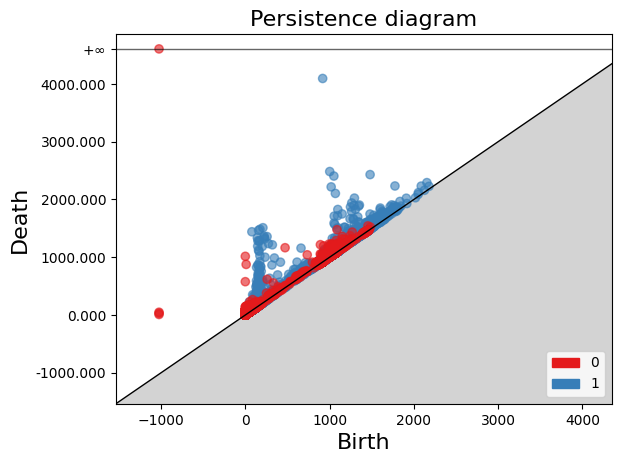

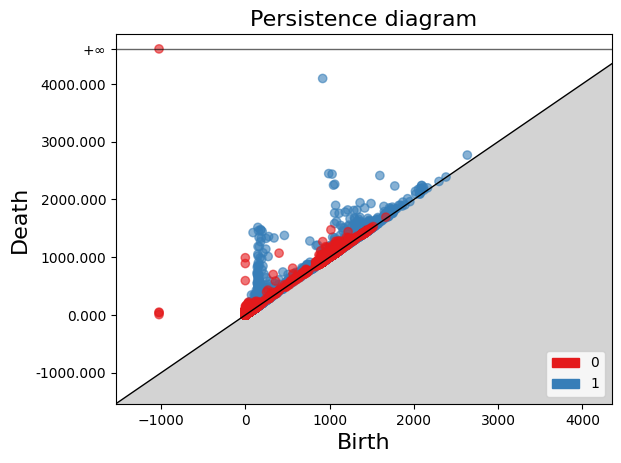

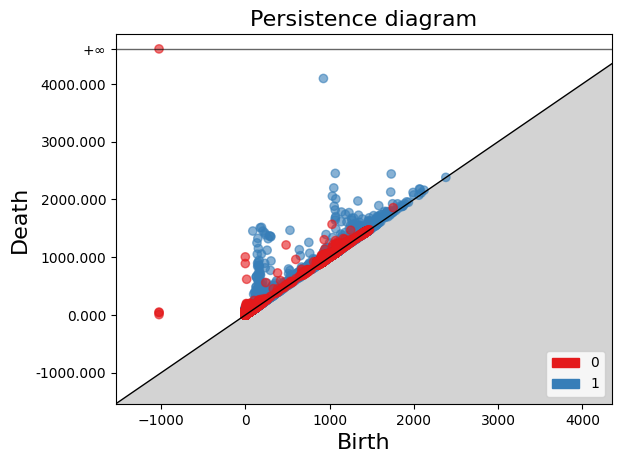

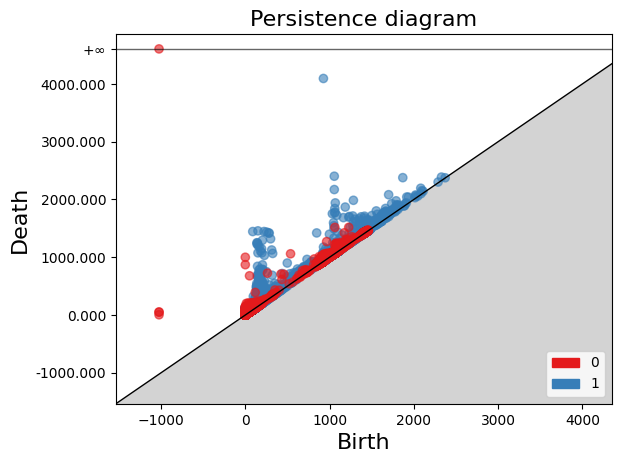

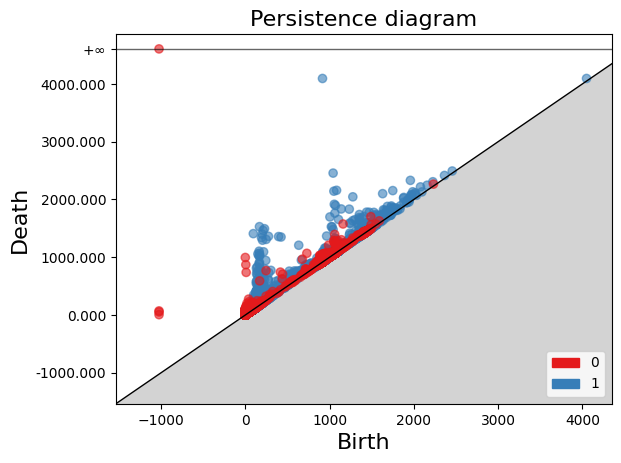

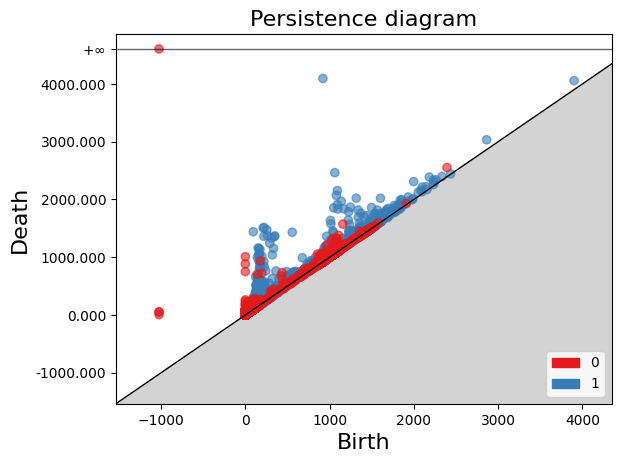

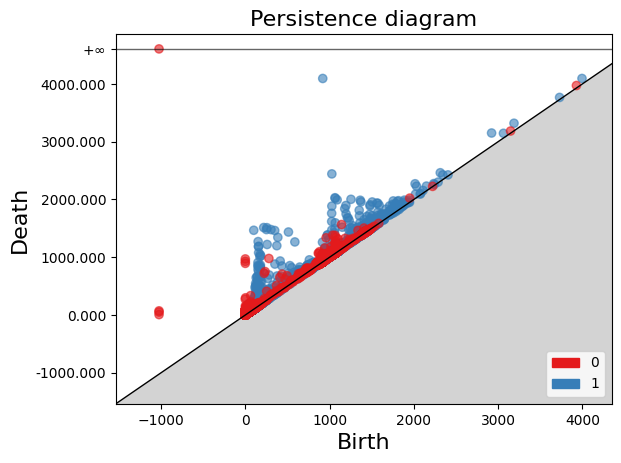

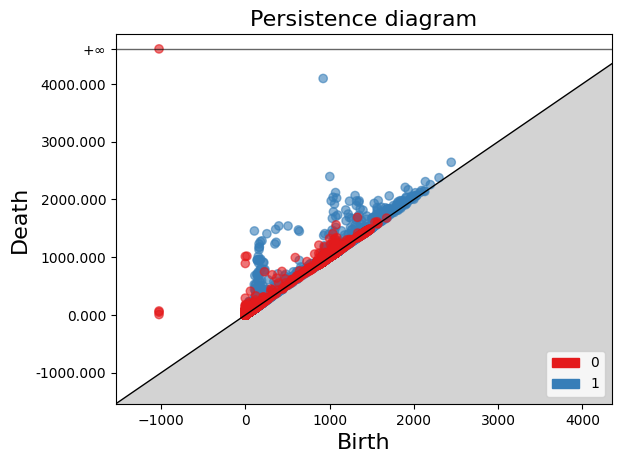

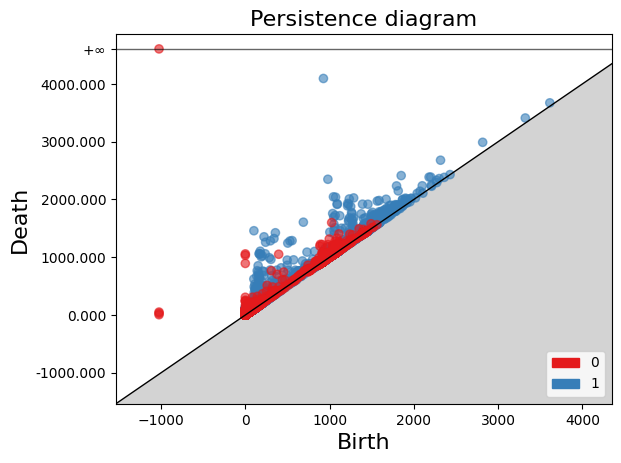

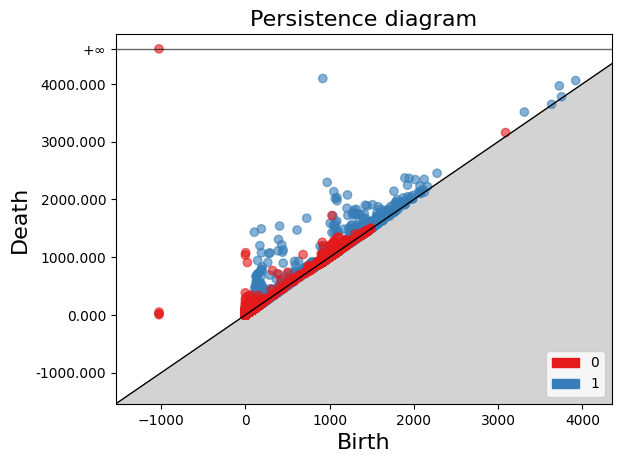

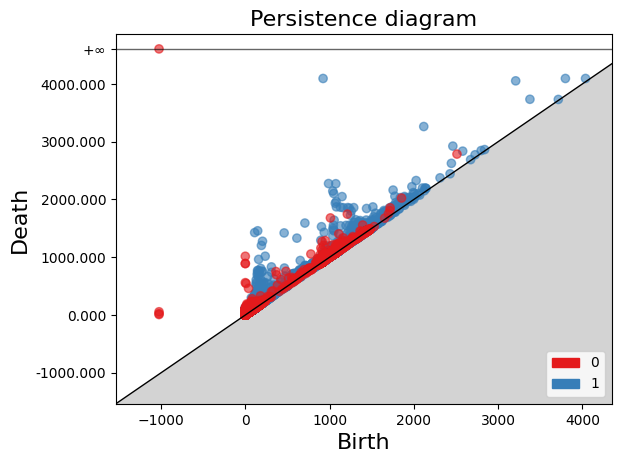

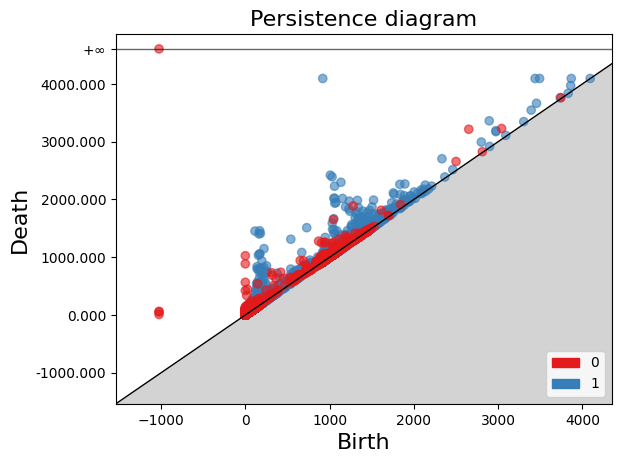

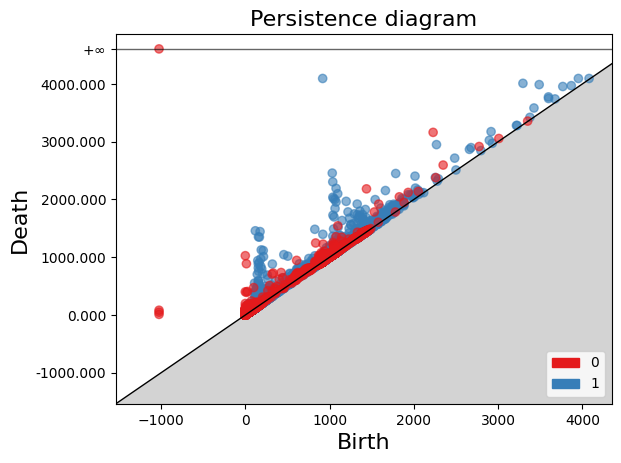

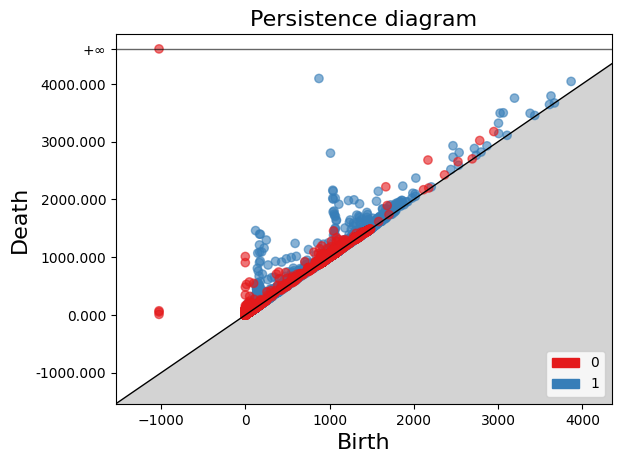

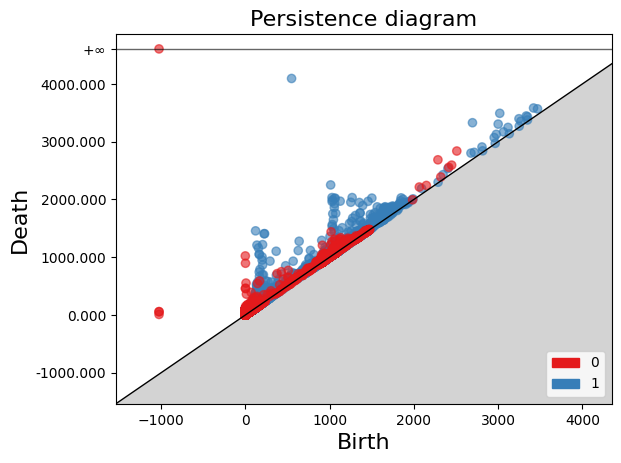

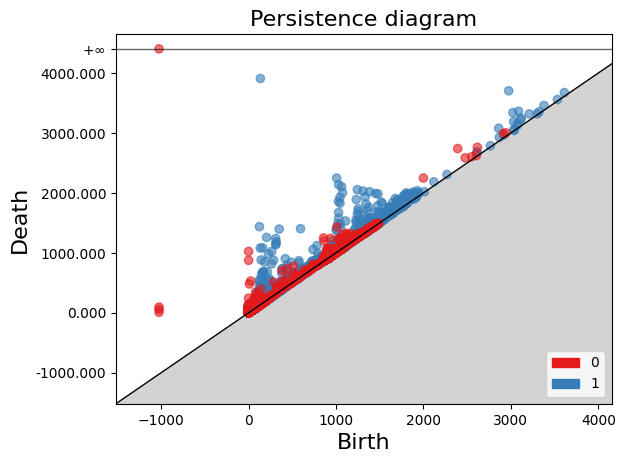

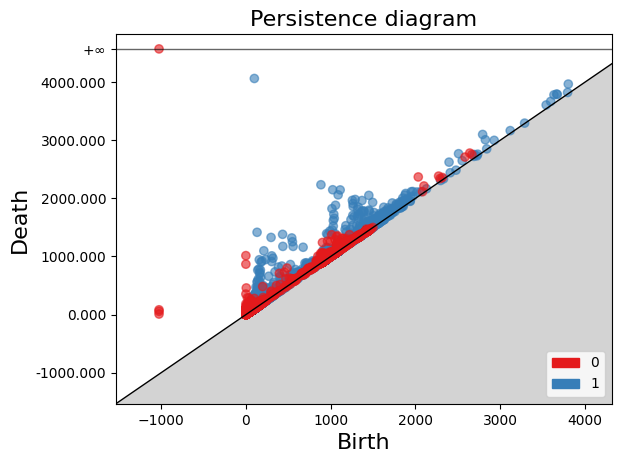

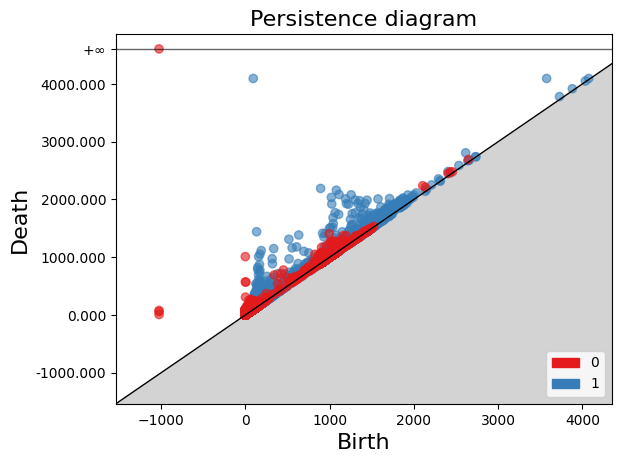

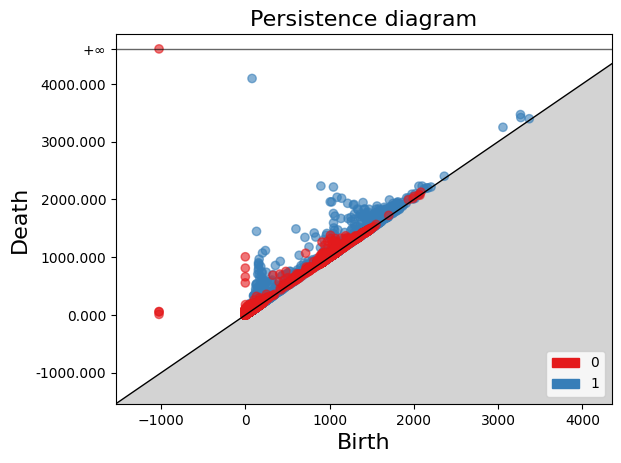

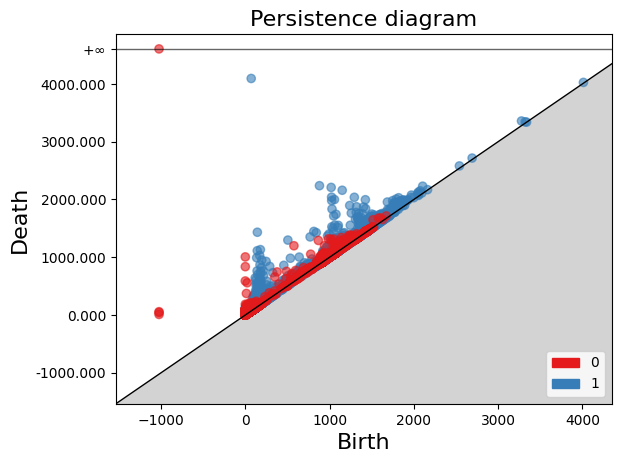

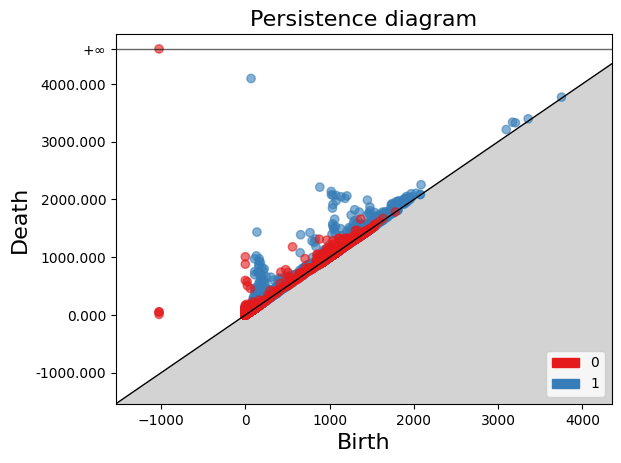

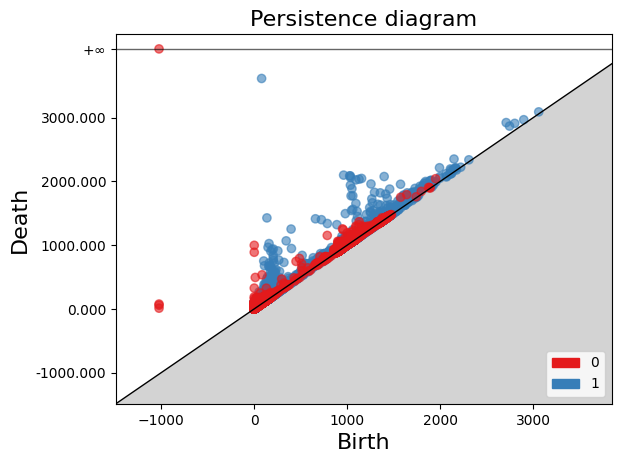

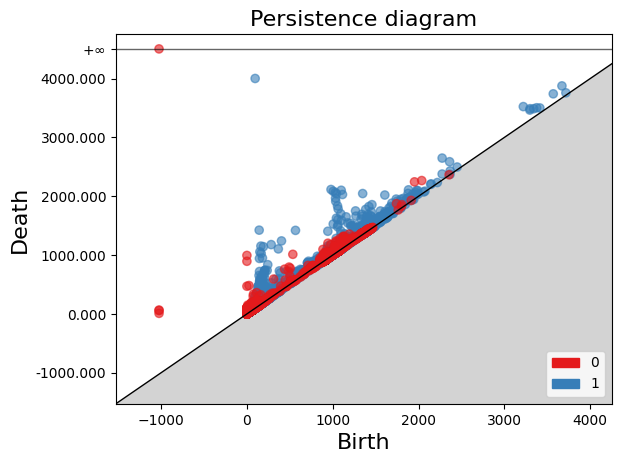

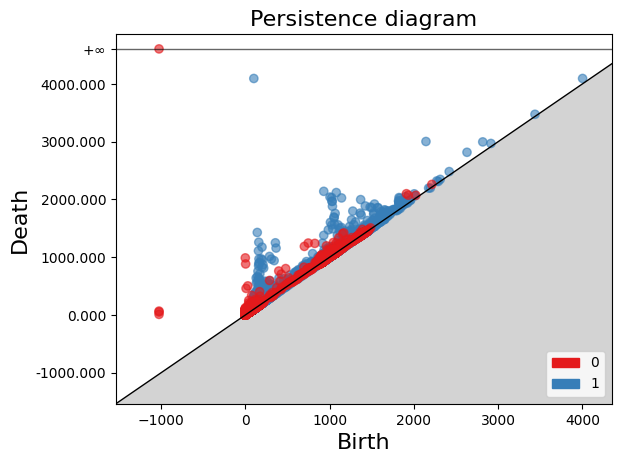

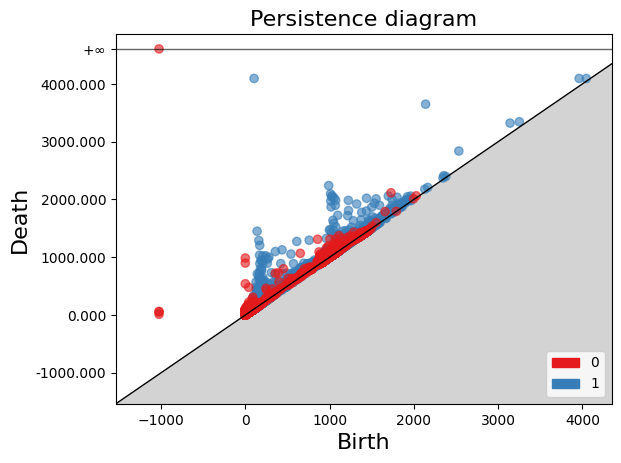

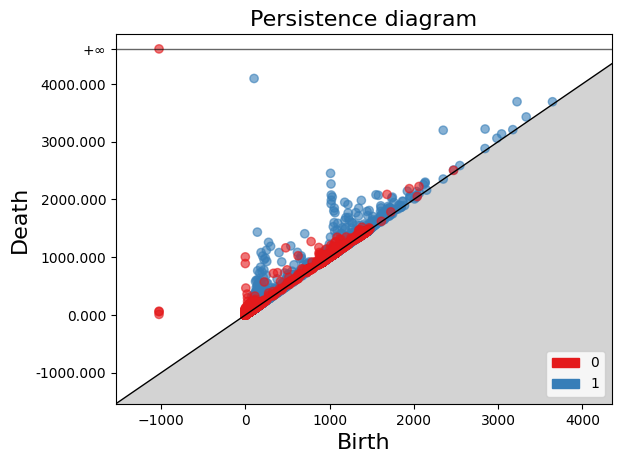

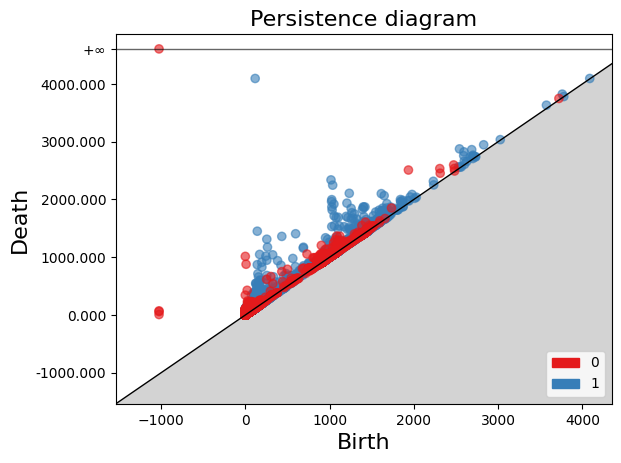

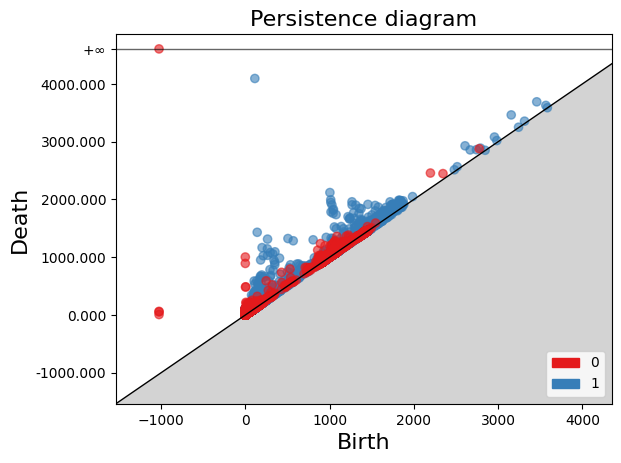

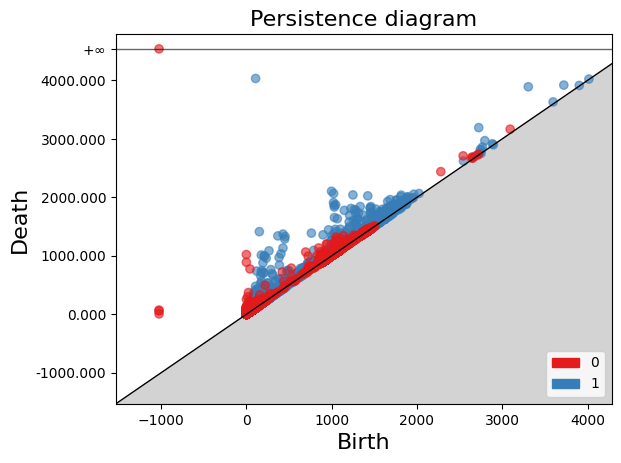

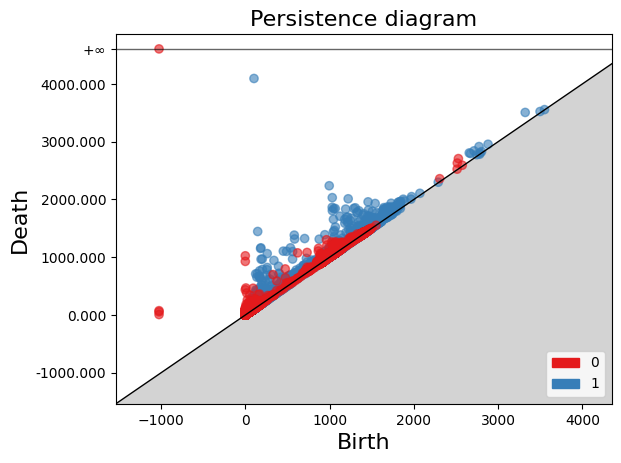

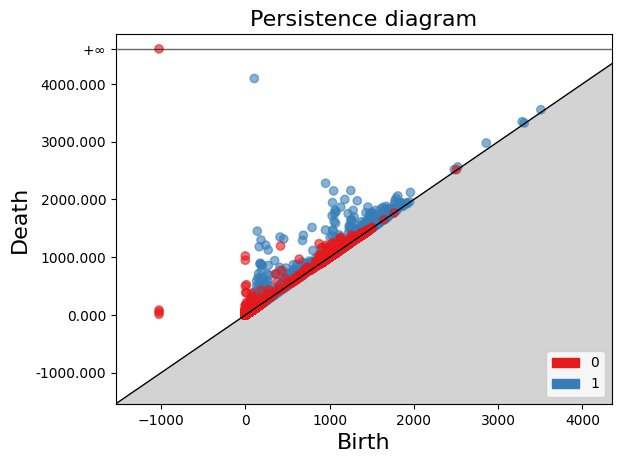

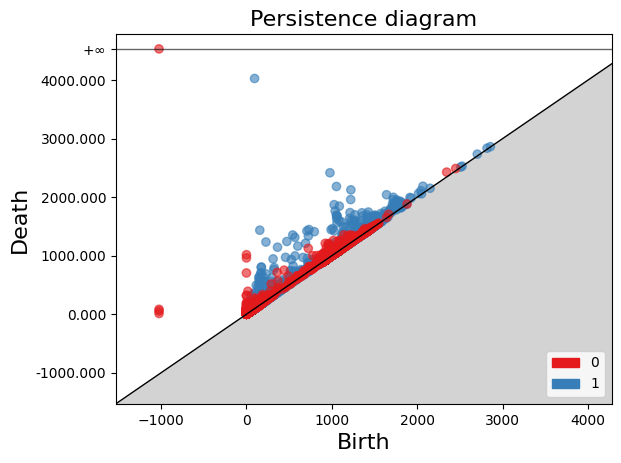

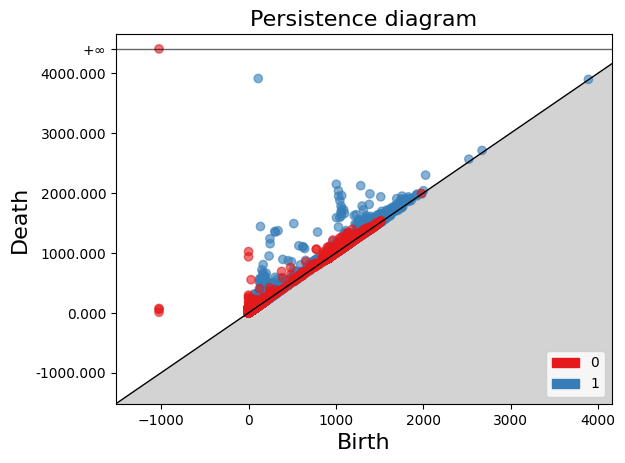

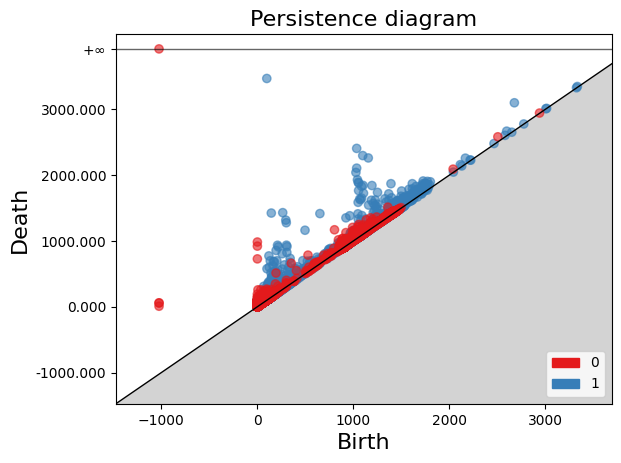

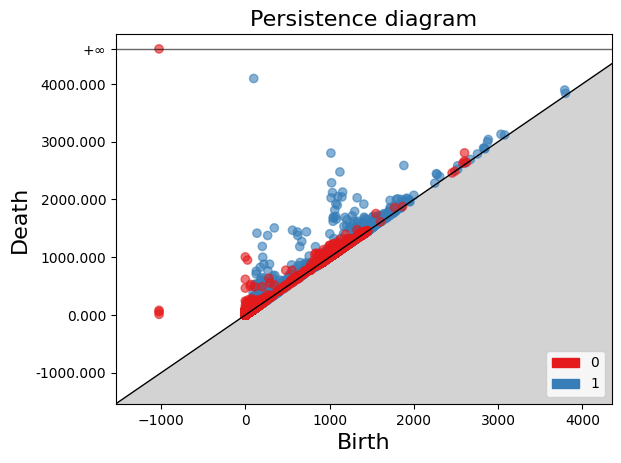

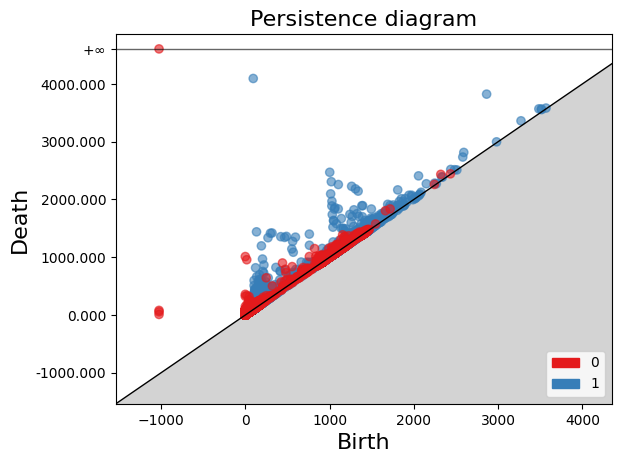

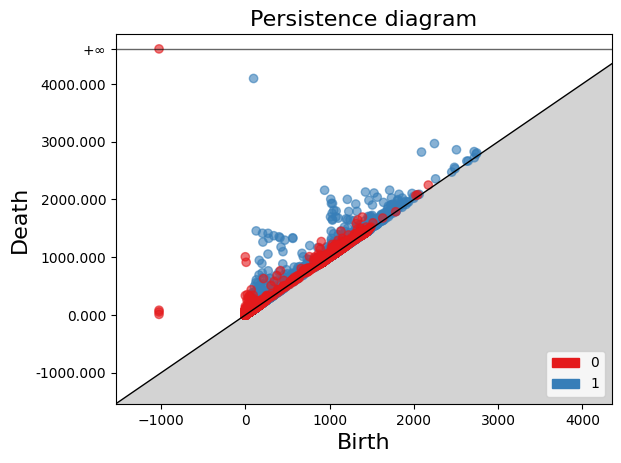

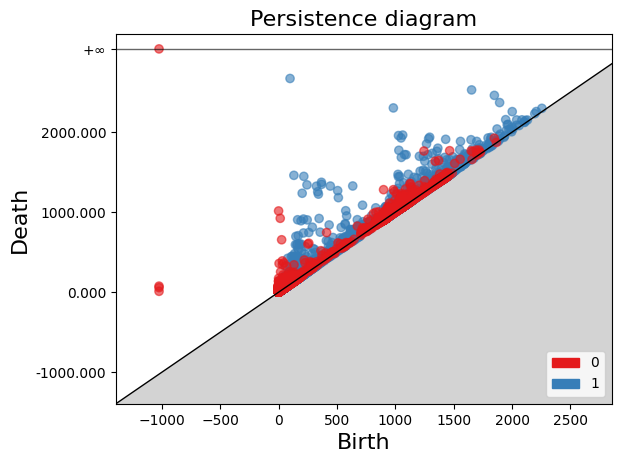

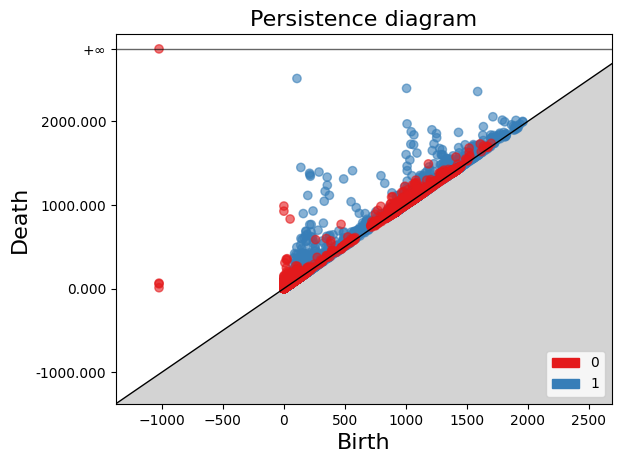

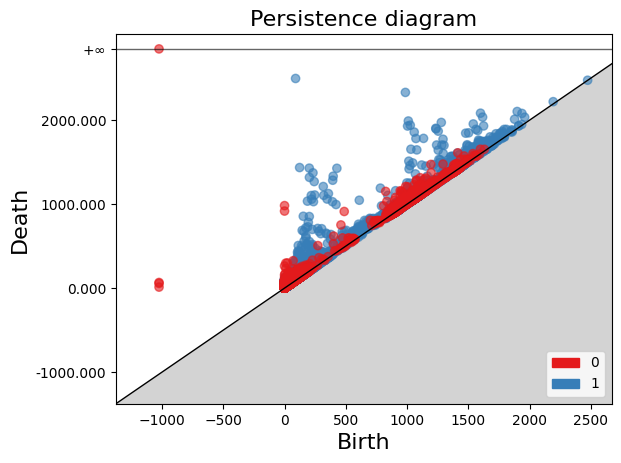

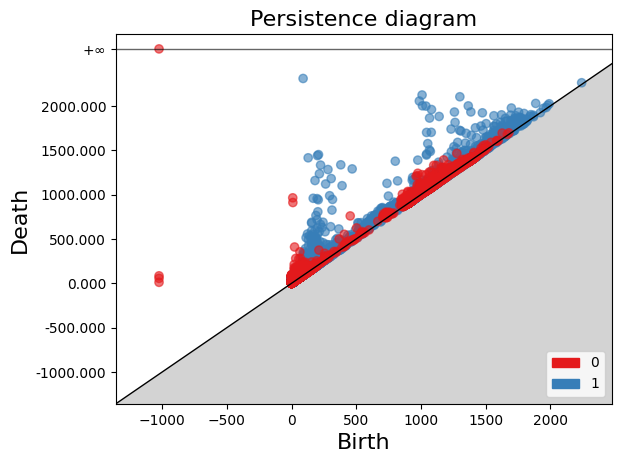

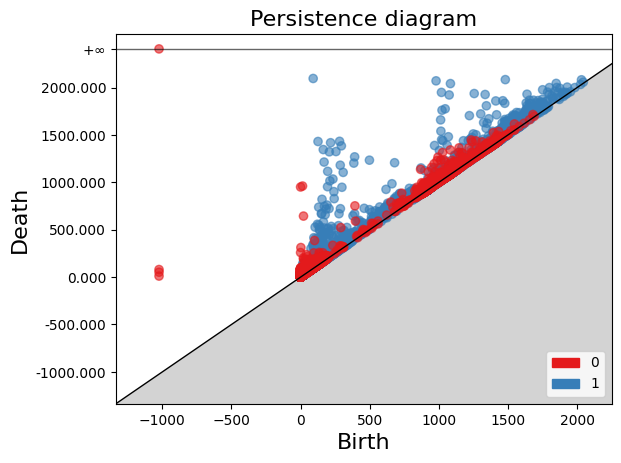

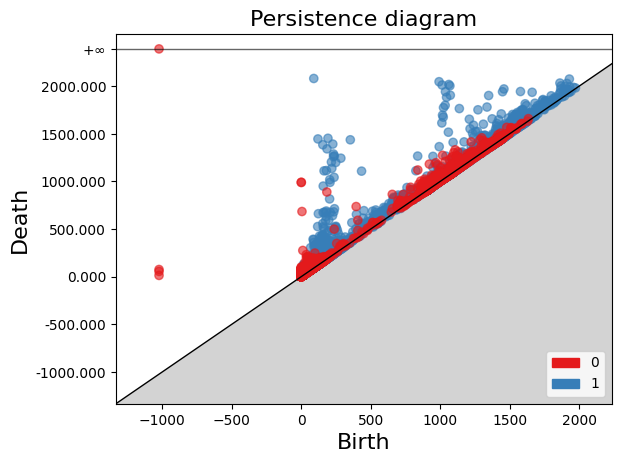

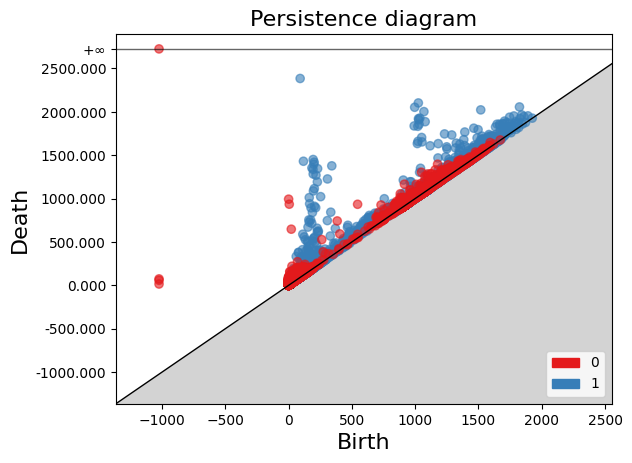

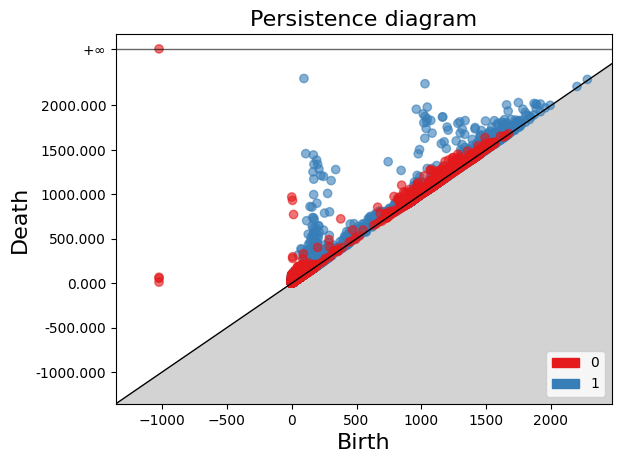

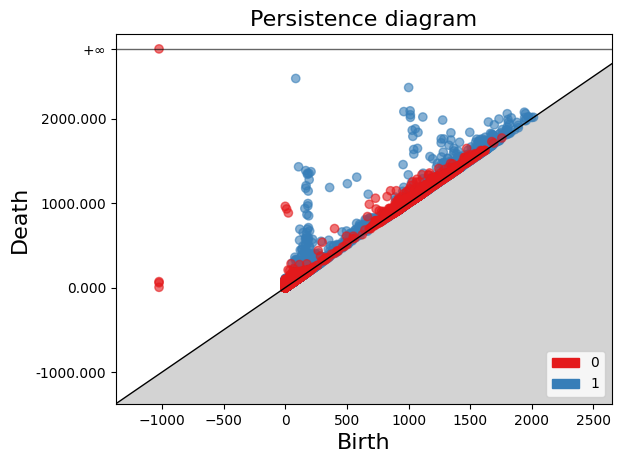

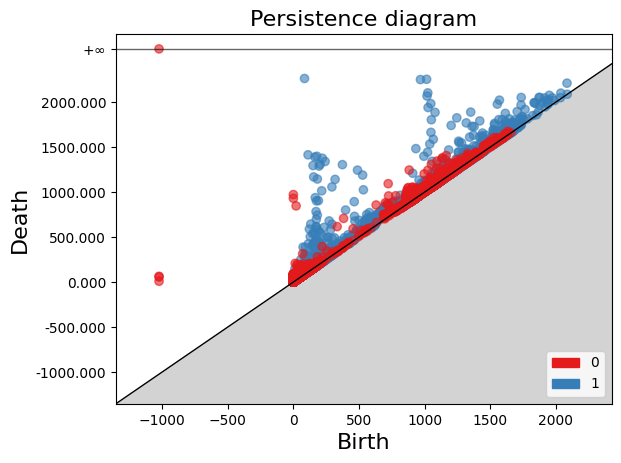

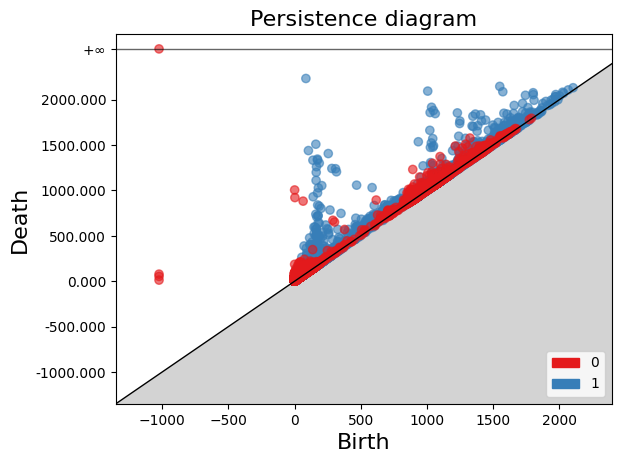

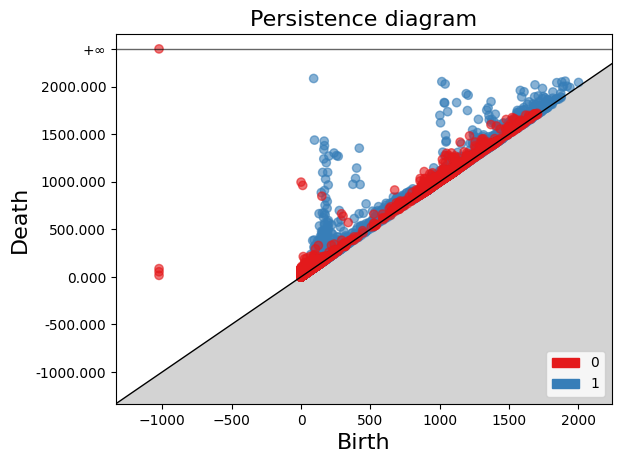

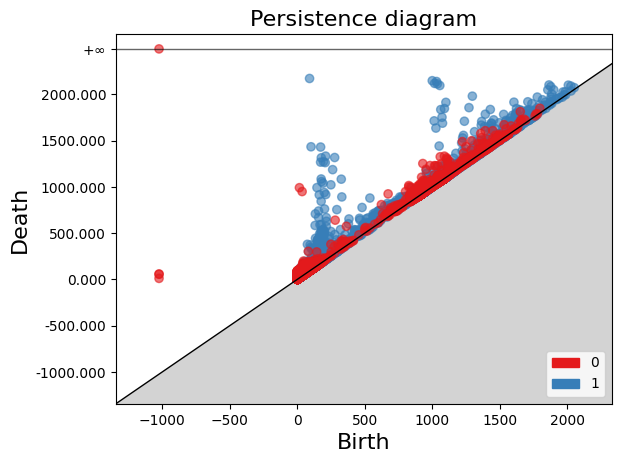

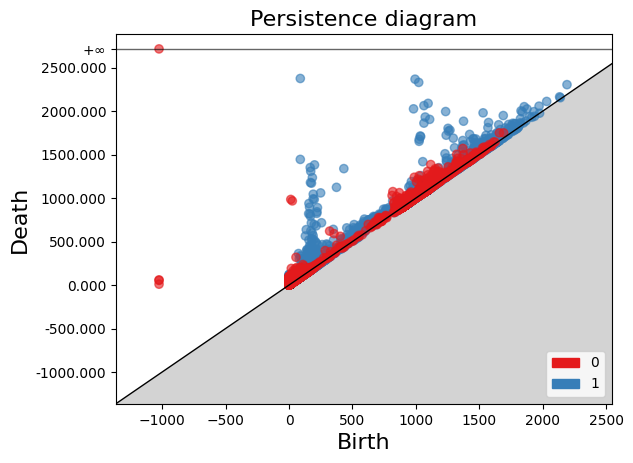

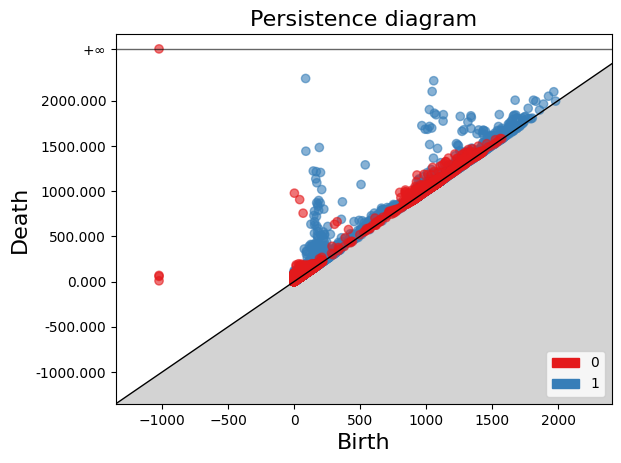

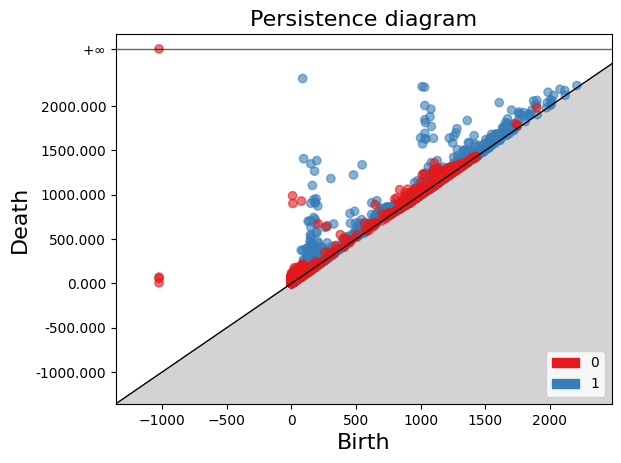

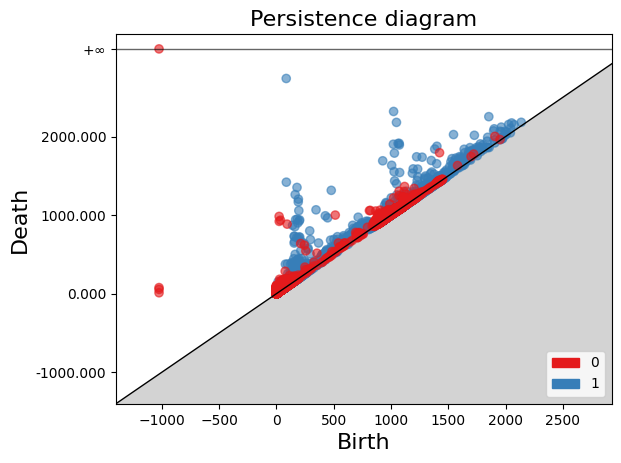

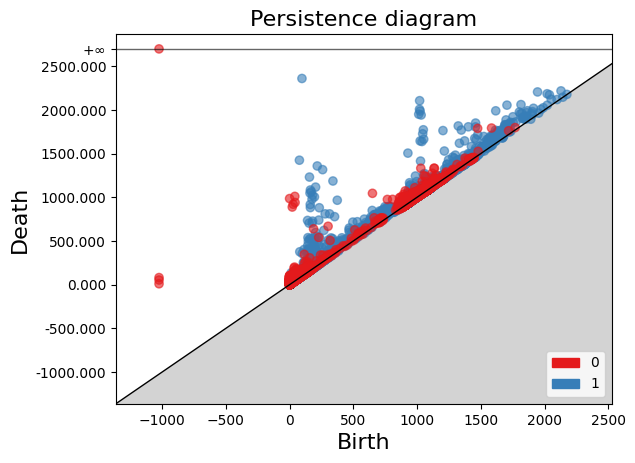

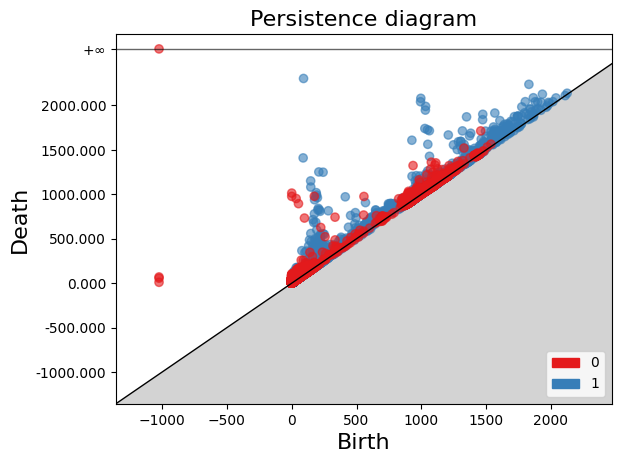

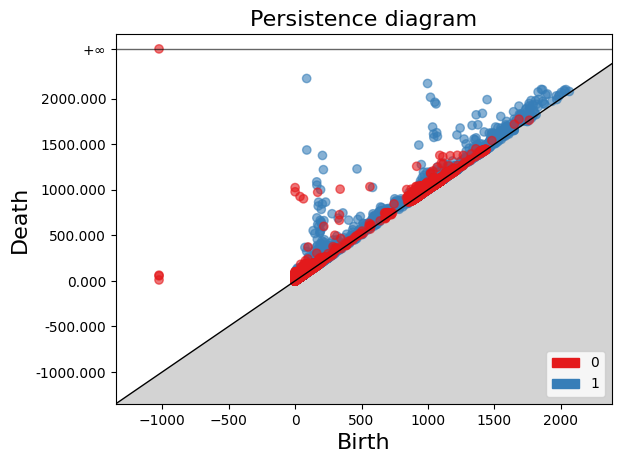

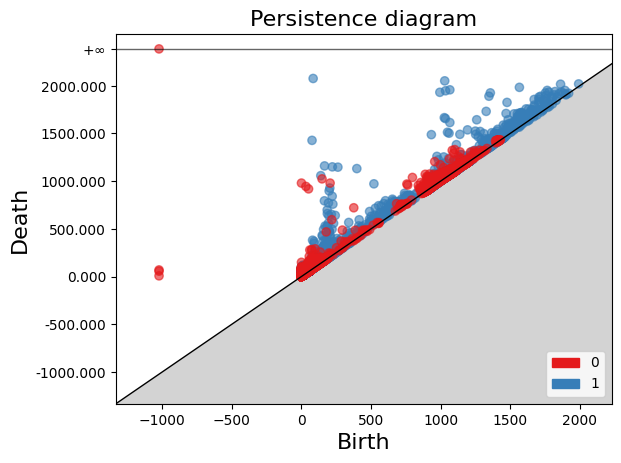

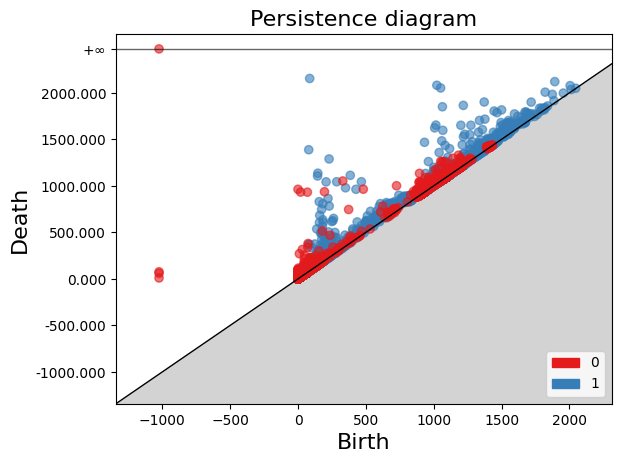

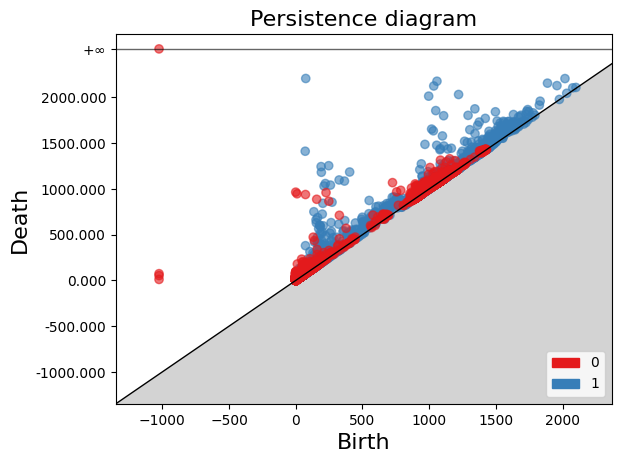

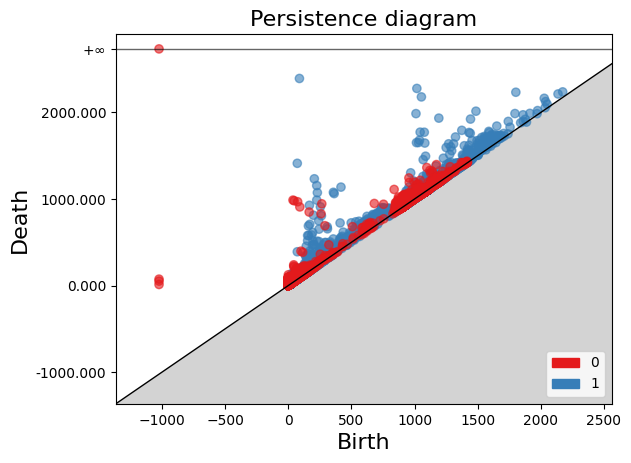

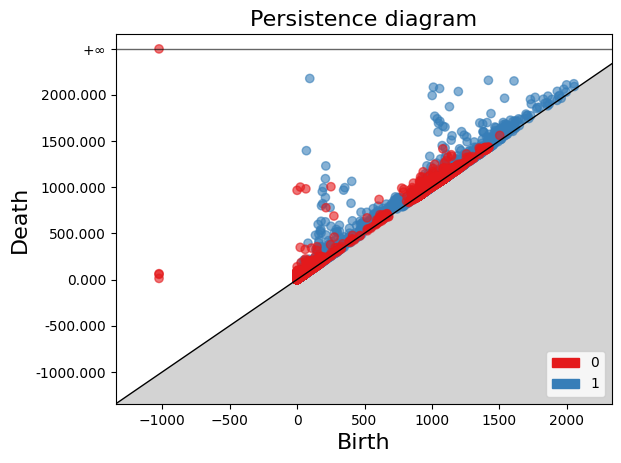

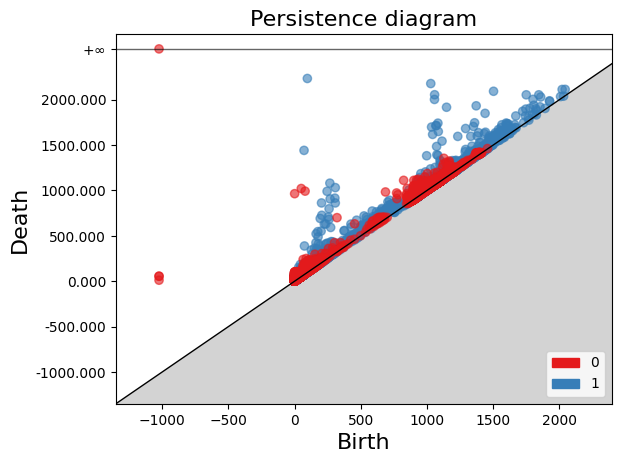

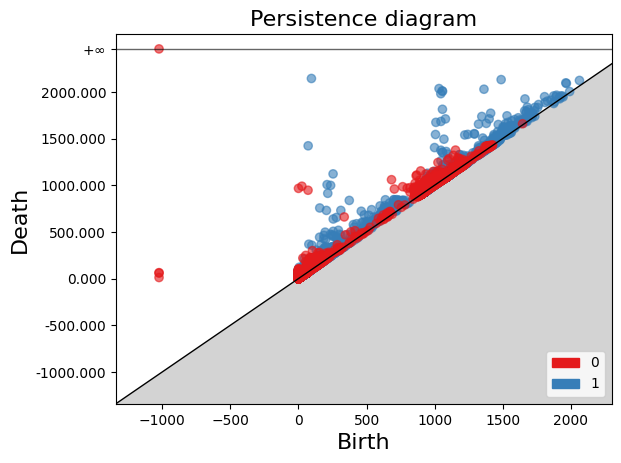

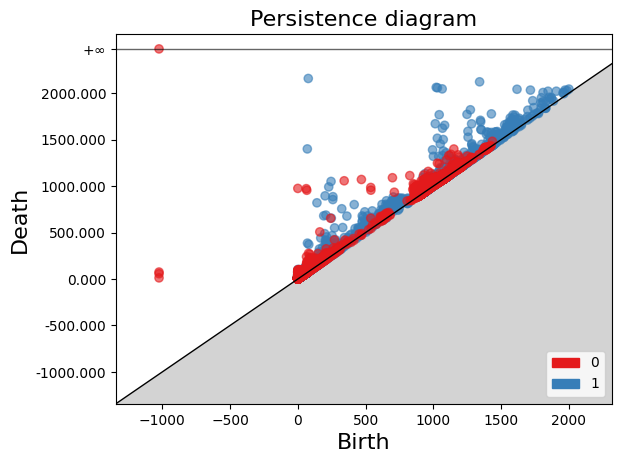

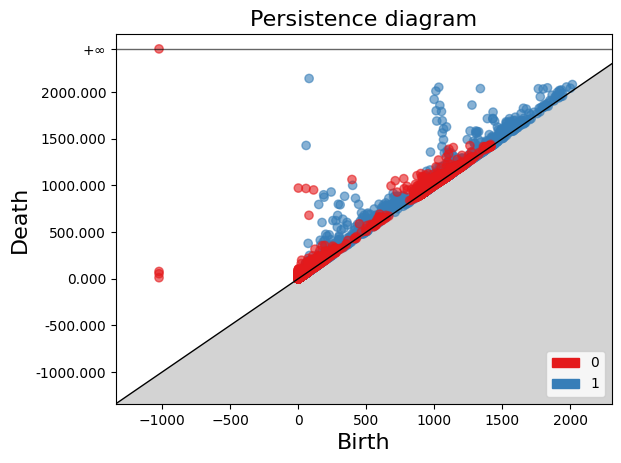

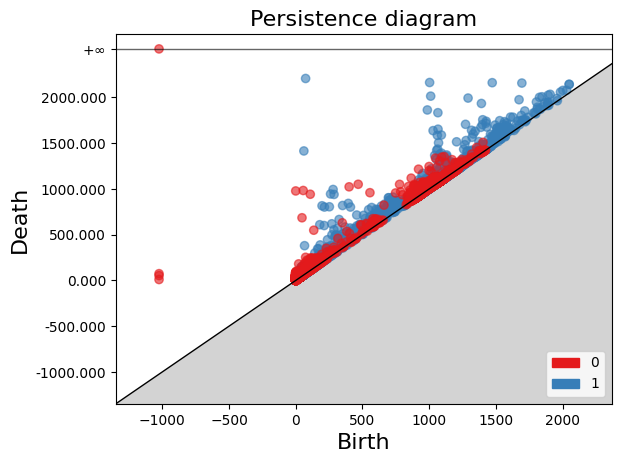

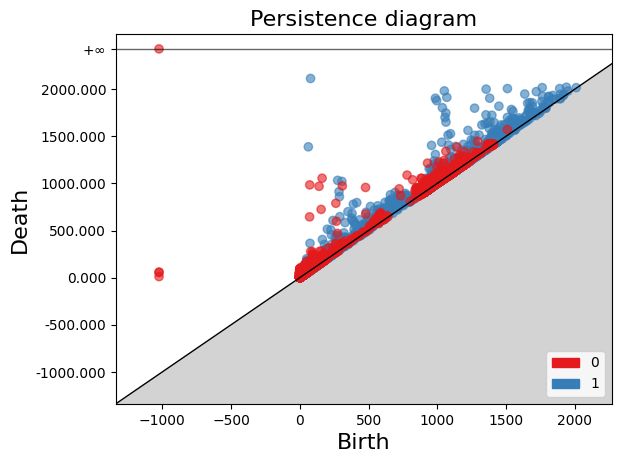

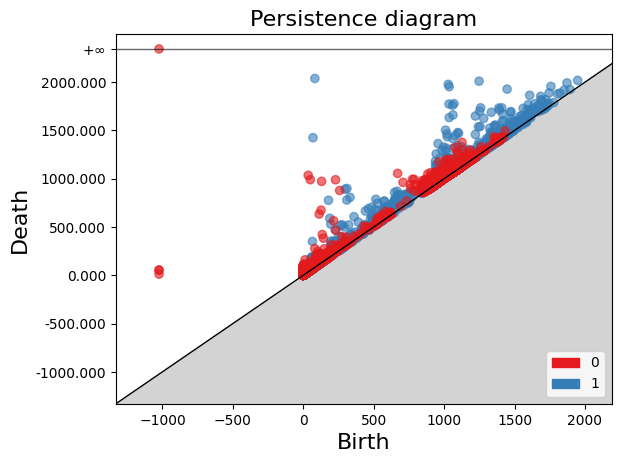

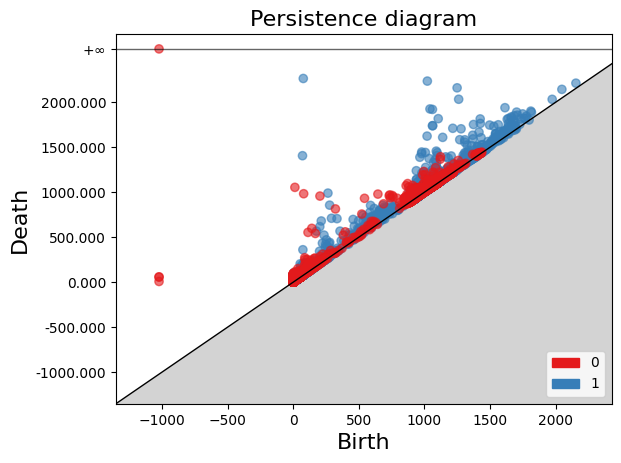

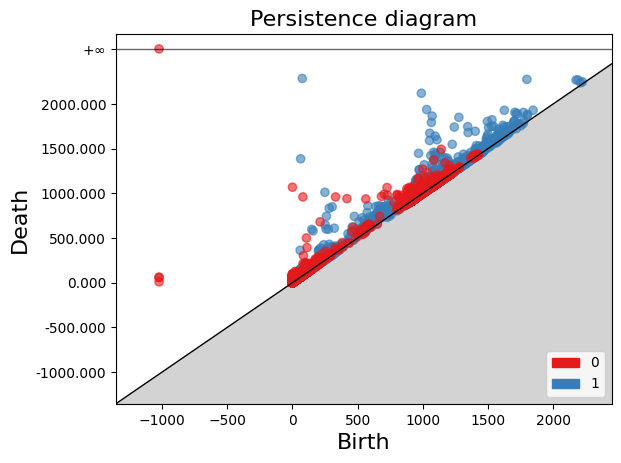

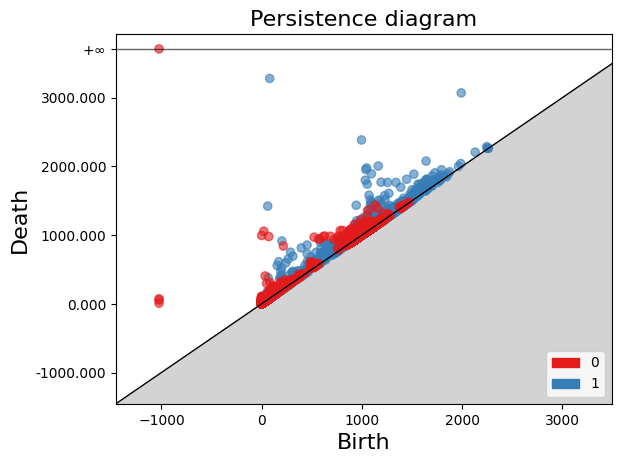

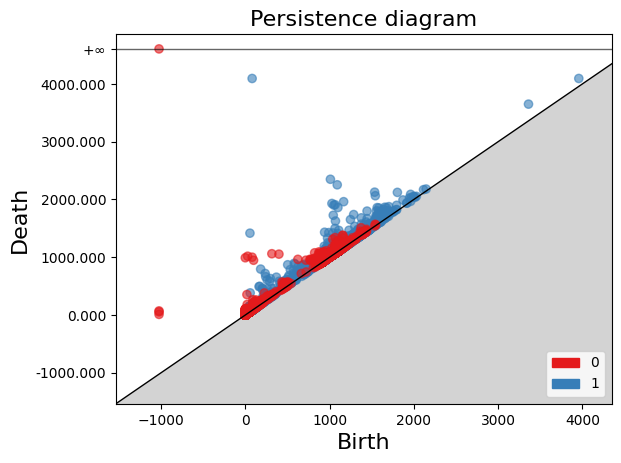

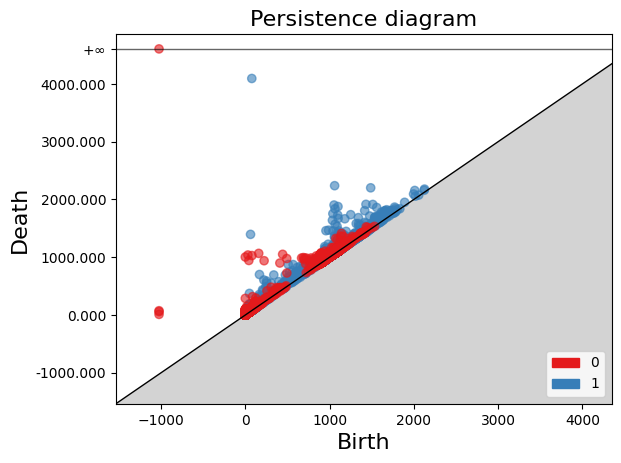

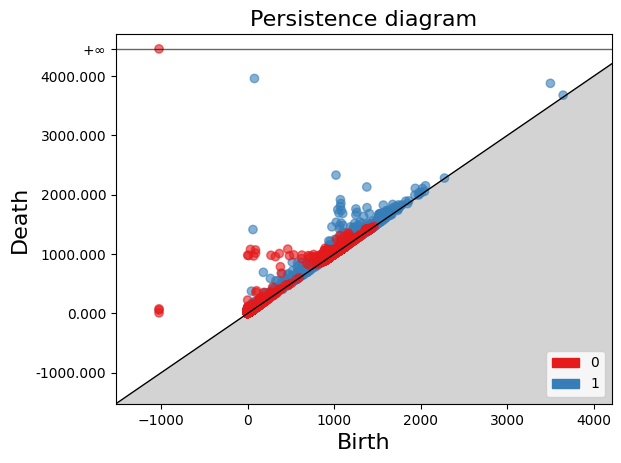

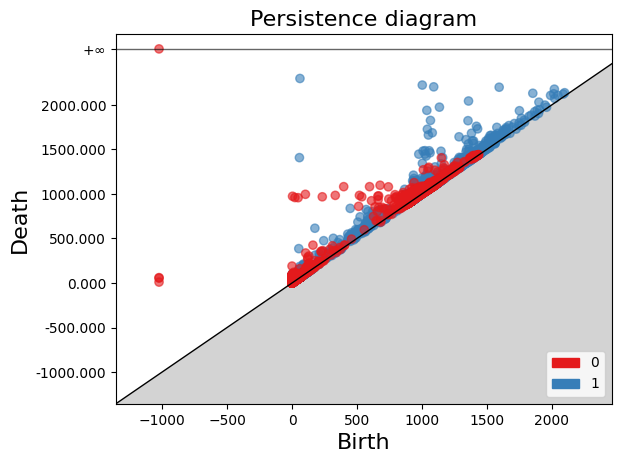

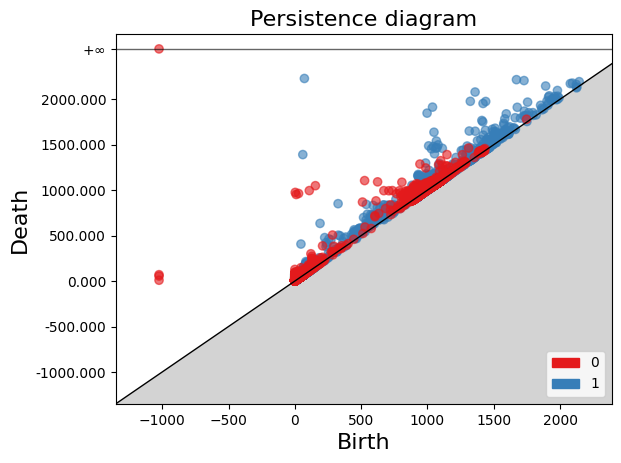

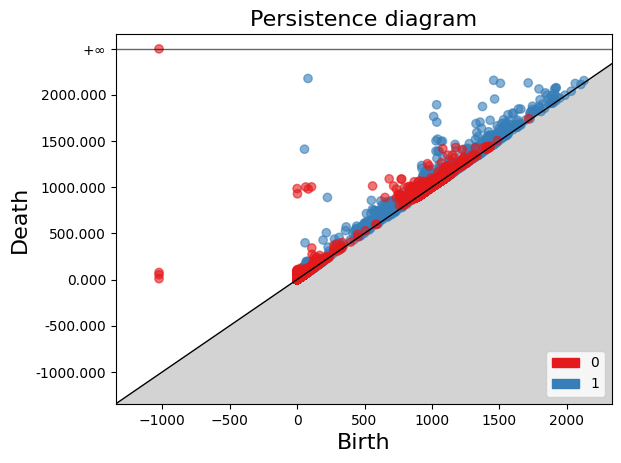

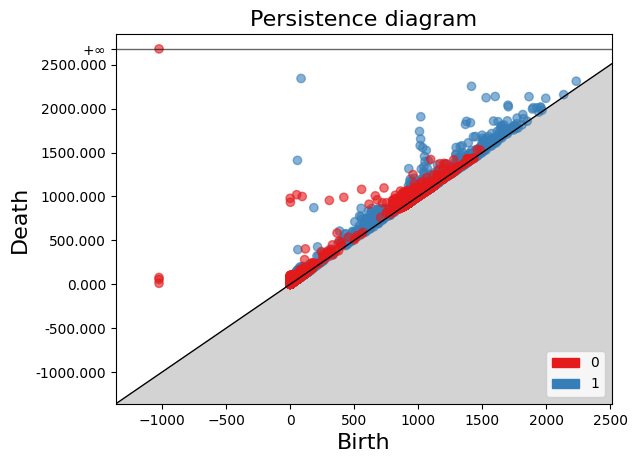

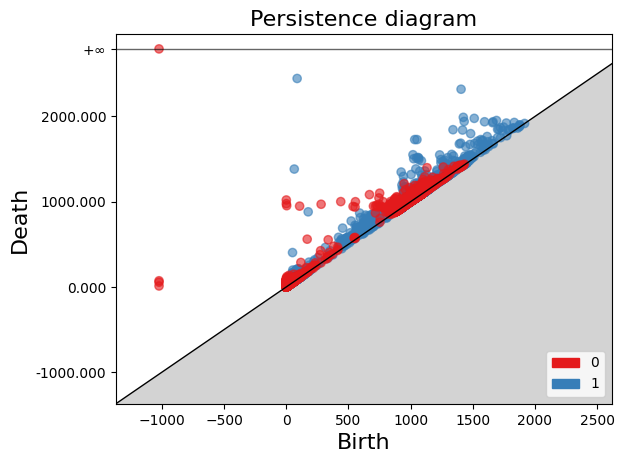

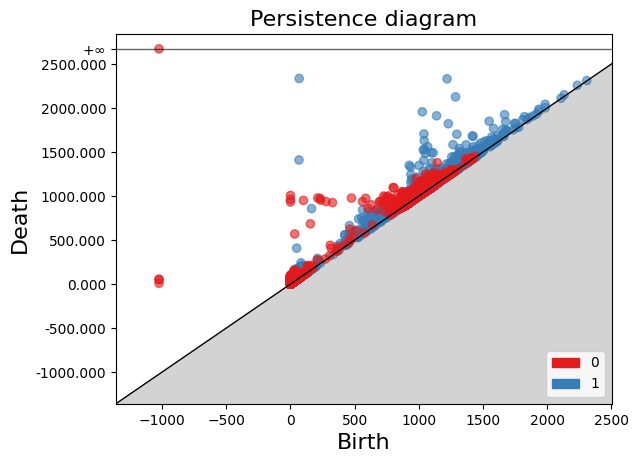

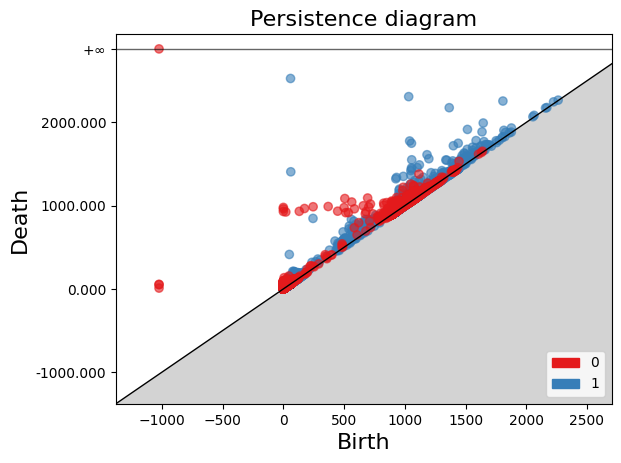

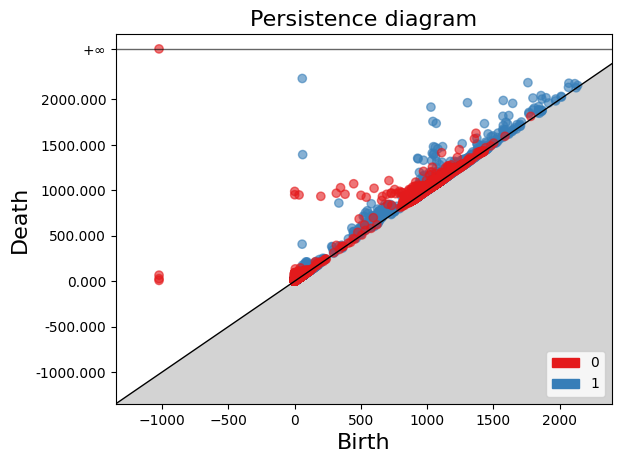

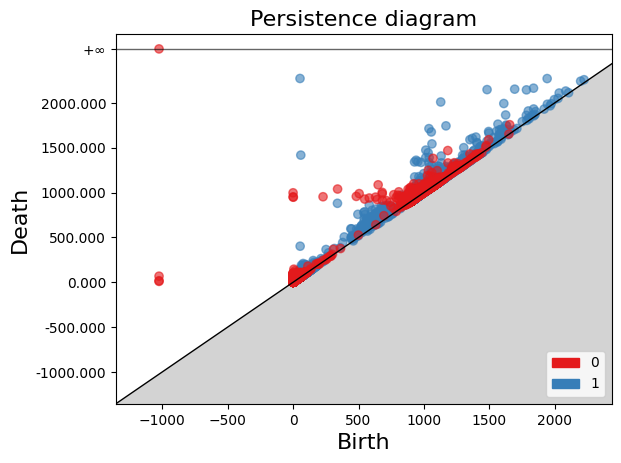

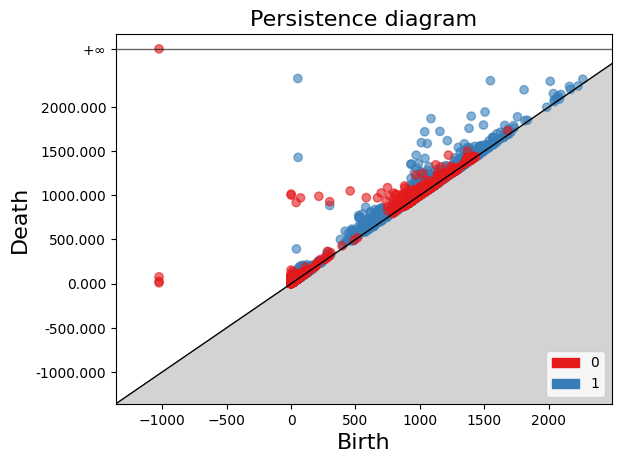

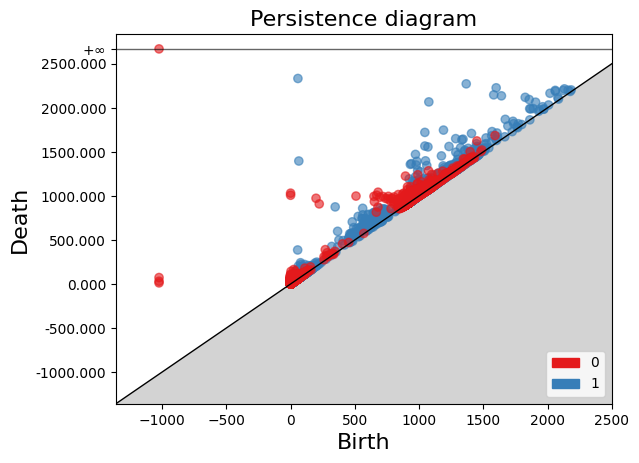

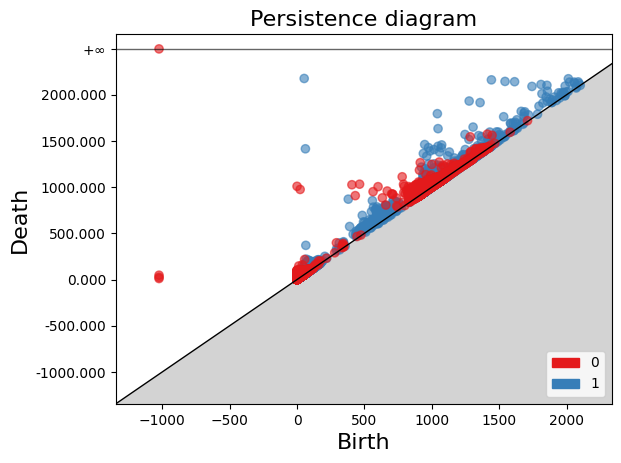

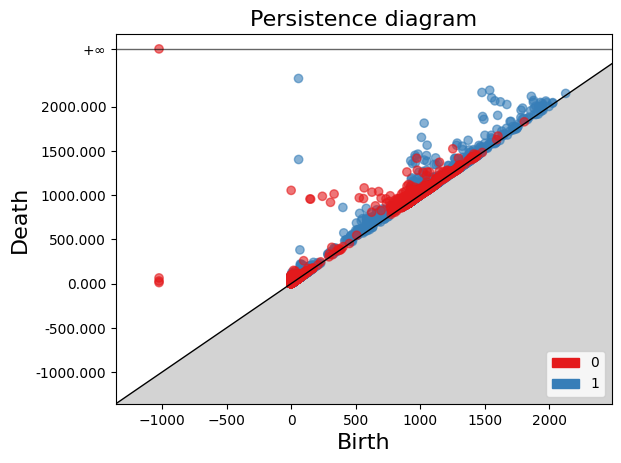

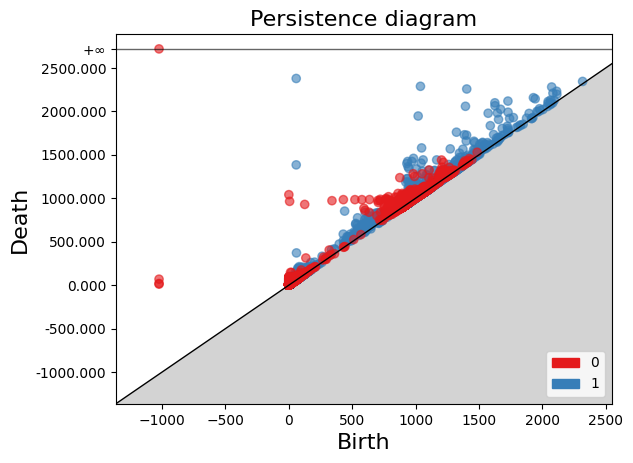

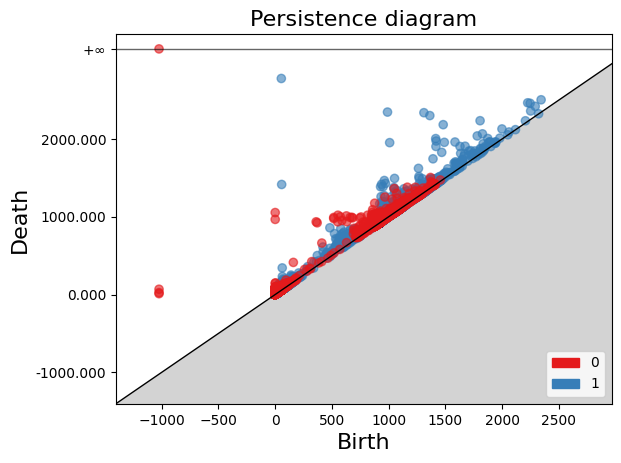

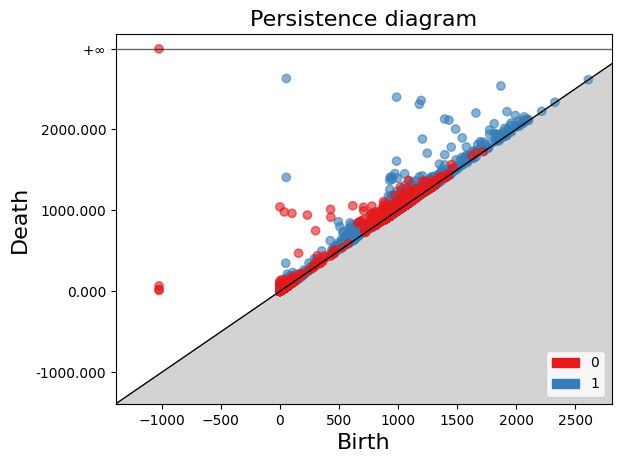

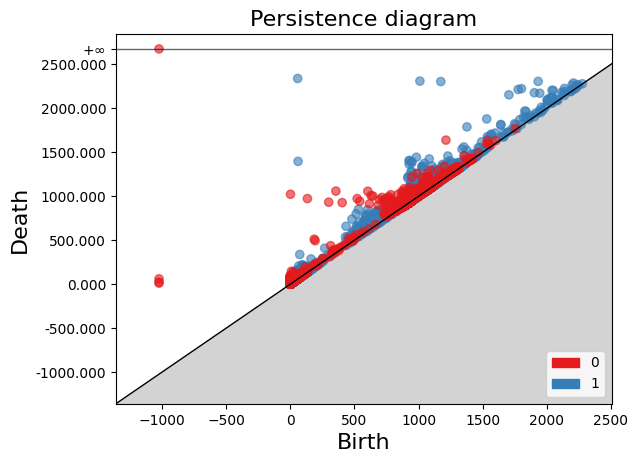

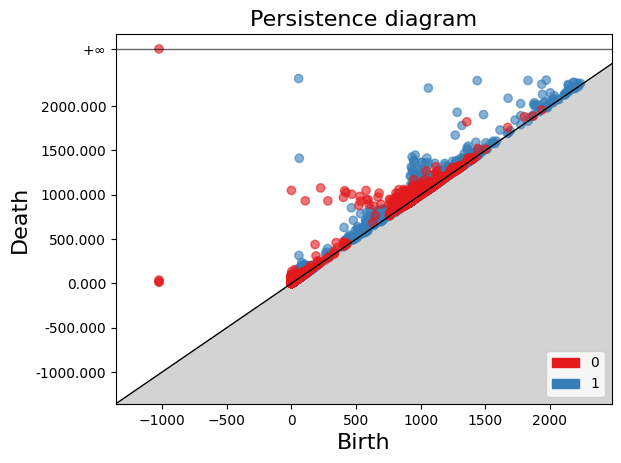

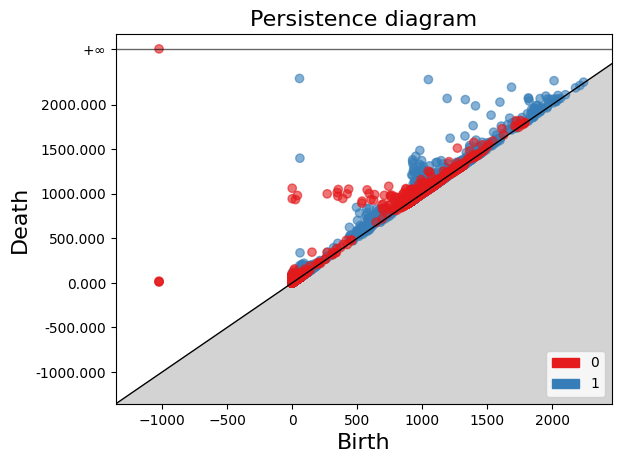

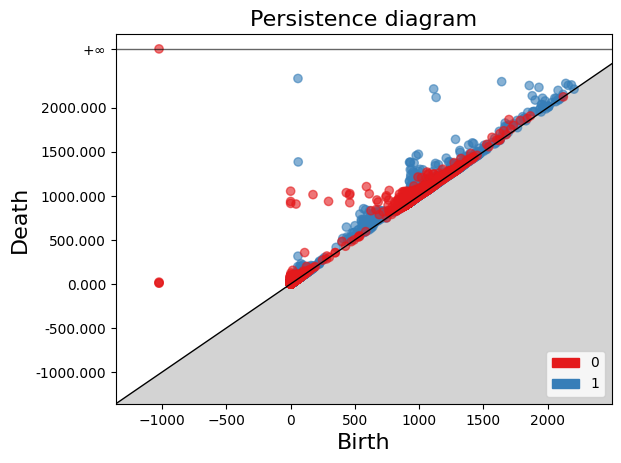

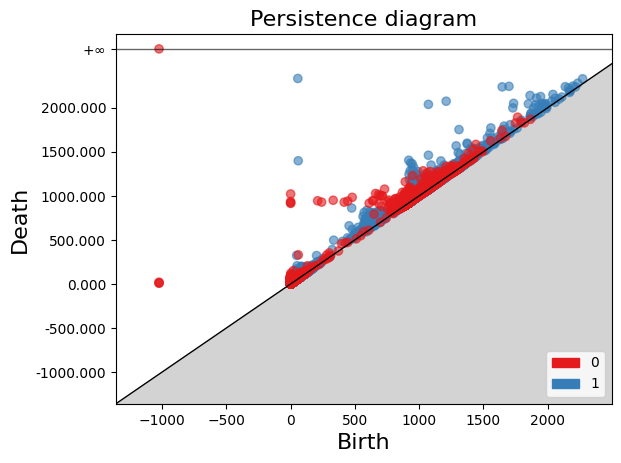

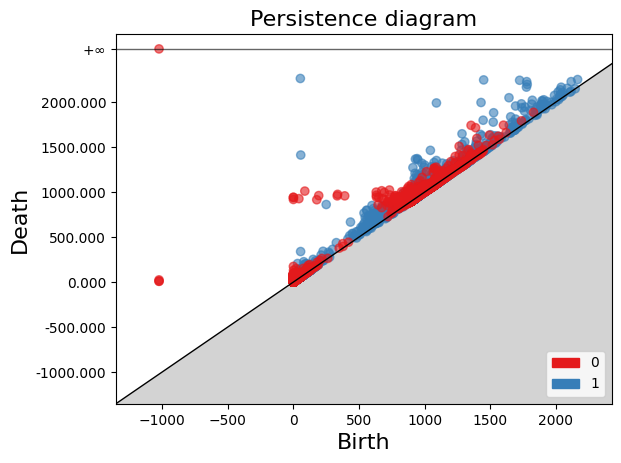

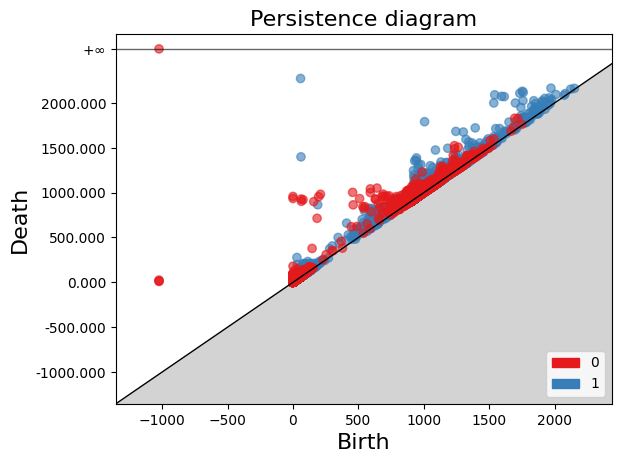

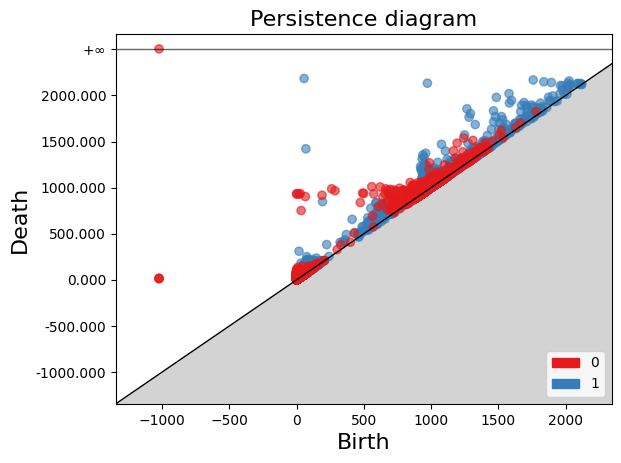

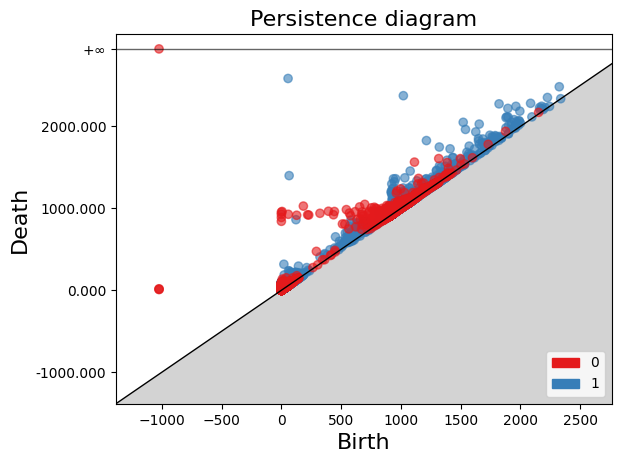

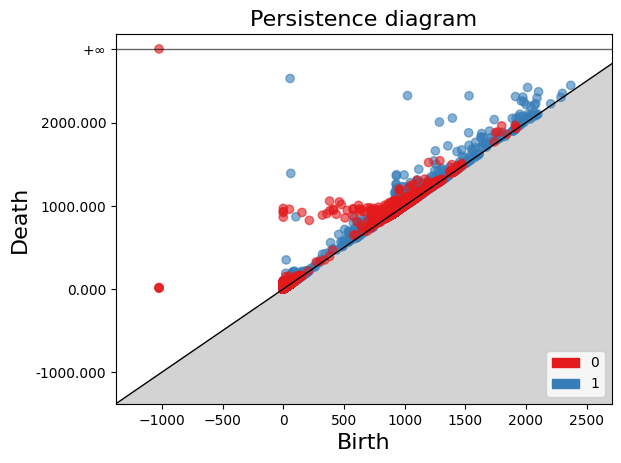

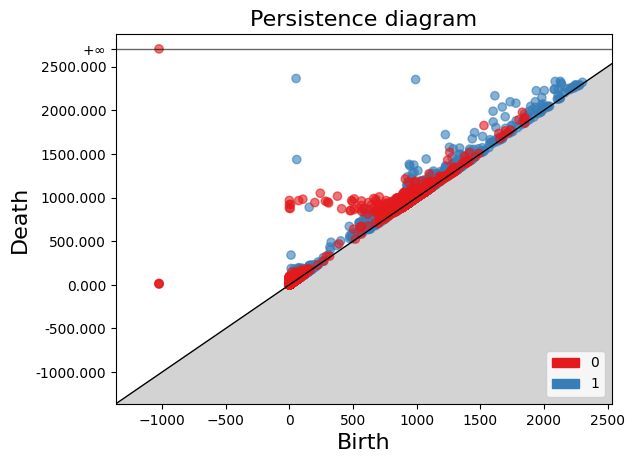

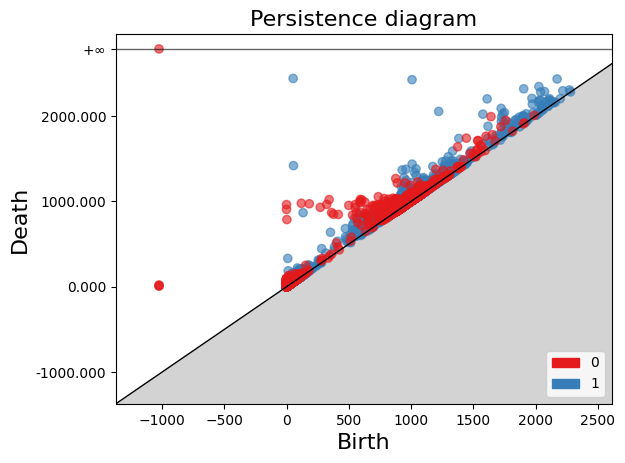

In [20]:
image_filenames=[]
for file in files:
    filename=file.replace('.dcm', '') +'.png'
    create_directory('diagrams')
    image_path = '{}/{}'.format(directory_path,file)
    ds = dicom.dcmread(image_path)
    pixel_array = ds.pixel_array
    cc = CubicalComplex(top_dimensional_cells=pixel_array)
    persistence = cc.persistence()
    gd.plot_persistence_diagram(persistence).figure.savefig('./diagrams/'+filename)
    image_filenames.append(filename)

In [28]:
create_gif('diagrams', image_filenames, 'diagrams')

/var/folders/ht/mykq2wl913j207mn871r_lv00000gp/T/ipykernel_89018/2048072133.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('./{}/{}'.format(path, filename)))


In [29]:
create_gif('ct_images', ct_filenames, 'ct_images')

/var/folders/ht/mykq2wl913j207mn871r_lv00000gp/T/ipykernel_89018/2048072133.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('./{}/{}'.format(path, filename)))
